 # Convolutional Neural Network Implementation

In [1]:
## Imports

import numpy as np  
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf 
import os
import seaborn as sns


# Loading Data

In [2]:
## Data Load

CLASS = {'Cars':0, 'Drones': 1, 'People':2}

list_of_file = []   # filename/details
list_of_img = []    # x
list_of_classi = [] # y

for root, dirs, files in os.walk(".", topdown=False):
    for file in files:
        if file.endswith('.csv'):
            tmp = root.strip().split('\\')
            if tmp[-2] in CLASS:
                list_of_classi.append(CLASS[tmp[-2]])
                list_of_file.append(os.path.join('\\'.join(tmp[-3:]),file))
                df = pd.read_csv(os.path.join(root,file), sep=',',header=None)
                list_of_img.append(df.values)

x = np.array(list_of_img)
y = np.array(list_of_classi)
d = np.array(list_of_file)
                
print(len(list_of_file), 'files loaded.')

17485 files loaded.


# Example Person Sample

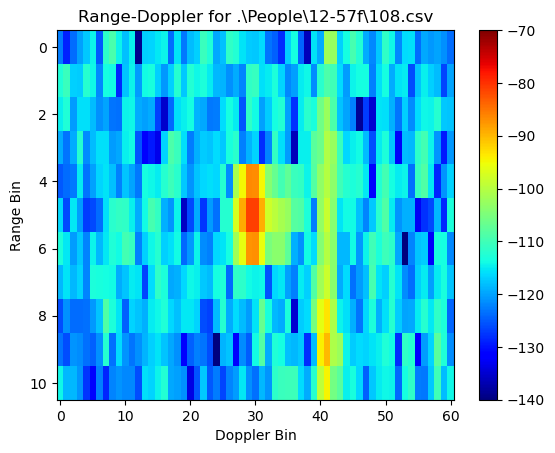

In [3]:
fig = plt.figure()
ax = plt.axes()
img = ax.imshow(list_of_img[16300], vmin=-140, vmax=-70, cmap='jet')
plt.title('Range-Doppler for {}'.format(list_of_file[16300]))
plt.axis('tight')
plt.ylabel('Range Bin')
plt.xlabel('Doppler Bin')
plt.colorbar(img)
plt.show()

# Example Drone Sample

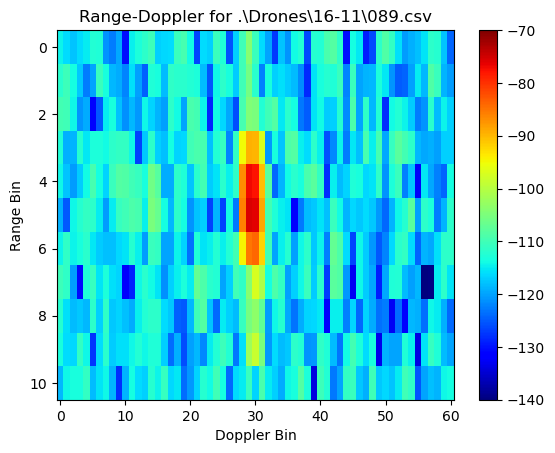

In [4]:
fig = plt.figure()
ax = plt.axes()
img = ax.imshow(list_of_img[10300], vmin=-140, vmax=-70, cmap='jet')
plt.title('Range-Doppler for {}'.format(list_of_file[10300]))
plt.axis('tight')
plt.ylabel('Range Bin')
plt.xlabel('Doppler Bin')
plt.colorbar(img)
plt.show()

# Example Car Sample

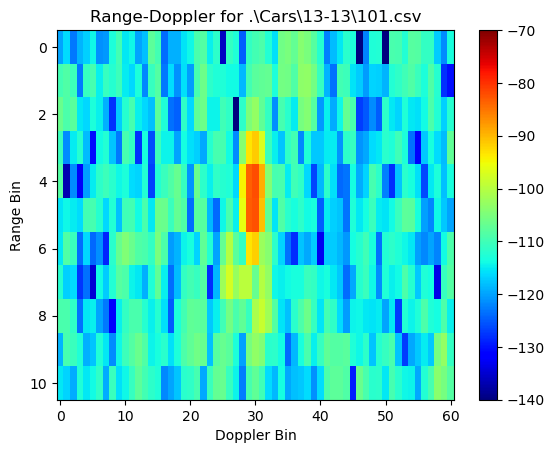

In [5]:
fig = plt.figure()
ax = plt.axes()
img = ax.imshow(list_of_img[100], vmin=-140, vmax=-70, cmap='jet')
plt.title('Range-Doppler for {}'.format(list_of_file[100]))
plt.axis('tight')
plt.ylabel('Range Bin')
plt.xlabel('Doppler Bin')
plt.colorbar(img)
plt.show()

# Data Preprocessing

In [6]:
# Preprocessing the Data
from sklearn.model_selection import train_test_split

## Convert list_of_img to linear, and scale to 0 to 1
#x = np.power(10, x/10)
#x = x/np.max(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Defining the Utility Functions to Plot Accuracies and Losses

In [7]:
##Defining utility functions to plot Accuracies and Losses

def smooth_curve(points,factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)

  return smoothed_points

def plot_convergence():
  plt.figure(figsize=(10, 5))
  plt.subplot(1,2,1)
  plt.plot(smooth_curve(history.history['accuracy']), marker= 'o', label = 'Train Accuracy')
  plt.plot(smooth_curve(history.history['val_accuracy']), marker= 'o', label = 'Validation Accuracy')
  plt.title('Training and Validation Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(smooth_curve(history.history['loss']),marker = 'o', label = 'Train Loss')
  plt.plot(smooth_curve(history.history['val_loss']),marker = 'o', label = 'Validation Loss')
  plt.title('Training and Validation Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()

def test_model_accuracy(model):
  test_loss,test_accuracy = model.evaluate(x_test, y_test)
  print(f"Test Accuracy: {test_accuracy * 100:.4f}%")
  plot_convergence()

# Model Building

In [8]:
import tensorflow as tf # tensorflow

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(11,61)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
350/350 [==============================] - 2s 3ms/step - loss: 2.3288 - accuracy: 0.4562 - val_loss: 1.0686 - val_accuracy: 0.5350
Epoch 2/50
350/350 [==============================] - 1s 2ms/step - loss: 0.9601 - accuracy: 0.6010 - val_loss: 0.5792 - val_accuracy: 0.7534
Epoch 3/50
350/350 [==============================] - 1s 2ms/step - loss: 0.6853 - accuracy: 0.7106 - val_loss: 0.5220 - val_accuracy: 0.8088
Epoch 4/50
350/350 [==============================] - 1s 2ms/step - loss: 0.6378 - accuracy: 0.7320 - val_loss: 0.5485 - val_accuracy: 0.7759
Epoch 5/50
350/350 [==============================] - 1s 2ms/step - loss: 0.5954 - accuracy: 0.7487 - val_loss: 0.6186 - val_accuracy: 0.6841
Epoch 6/50
350/350 [==============================] - 1s 2ms/step - loss: 0.5833 - accuracy: 0.7606 - val_loss: 0.7868 - val_accuracy: 0.6137
Epoch 7/50
350/350 [==============================] - 1s 2ms/step - loss: 0.7431 - accuracy: 0.7290 - val_loss: 1.1594 - val_accuracy: 0.5851
Epoch 

110/110 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8919
Test Accuracy: 89.1907%


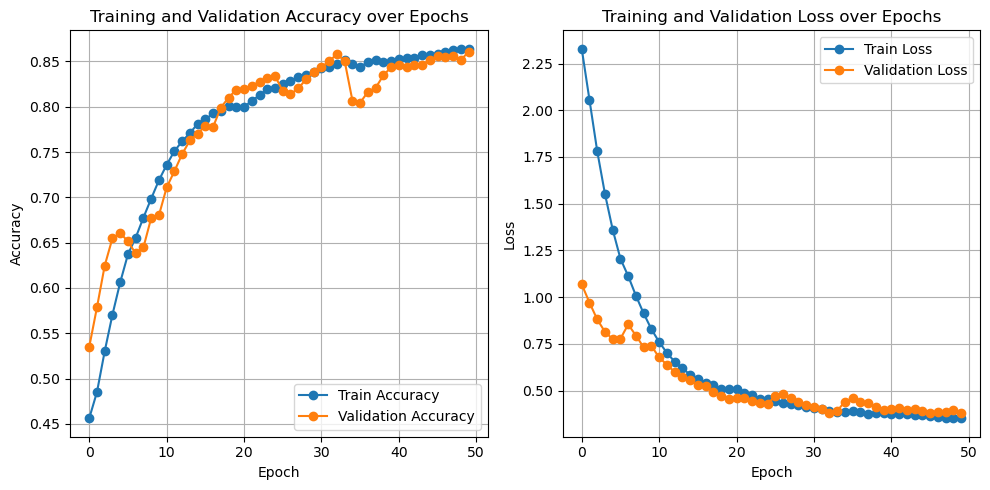

In [10]:
test_model_accuracy(model)

# Displaying Images and Their Predictions

110/110 [==============================] - 0s 1ms/step


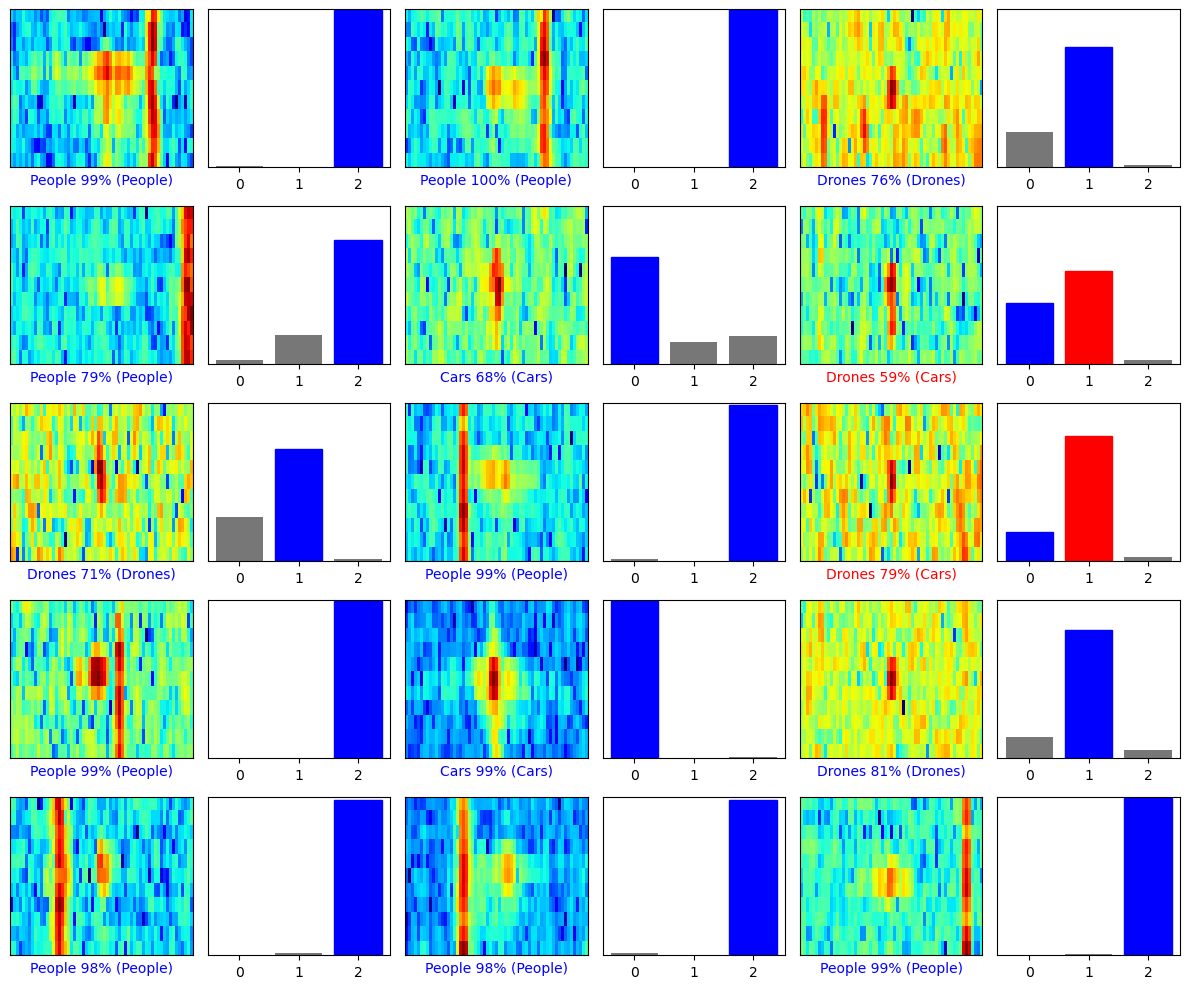

In [11]:
def get_key_from_value(search_value , dict_to_look = CLASS):
    for k, v in dict_to_look.items():
        if v == search_value:
            return k

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.jet, aspect='auto')
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(get_key_from_value(predicted_label),
                                100*np.max(predictions_array),
                                get_key_from_value(true_label)),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(3))
    plt.yticks([])
    thisplot = plt.bar(range(3), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

probability_model = tf.keras.Sequential([model, 
                                     tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
j = np.random.choice(len(x_test),num_images) # choose 5*3 at random
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(j[i], predictions[j[i]], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(j[i], predictions[j[i]], y_test)
plt.tight_layout()
plt.show()


# Reshaping

In [12]:
from tensorflow.keras.utils import to_categorical
x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

x_train=np.reshape(x_train,[-1,11,61,1])
x_test=np.reshape(x_test,[-1,11,61,1])

y_train = (to_categorical(y_train, 3))
y_test = (to_categorical(y_test, 3))


# Convolutional Model Building
### Convolutional Layer (32)
### Dense Layer (64)
### Dense Layer (64)
### Dense Layer (64)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_10 (Flatten)        (None, 16992)             0         
                                                                 
 dense_39 (Dense)            (None, 64)                1087552   
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dense_41 (Dense)            (None, 64)                4160      
                                                                 
 dense_42 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,096,387
Trainable params: 1,096,387
N

In [41]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
350/350 [==============================] - 15s 40ms/step - loss: 1.3176 - accuracy: 0.7708 - val_loss: 0.3658 - val_accuracy: 0.8635
Epoch 2/50
350/350 [==============================] - 14s 39ms/step - loss: 0.2725 - accuracy: 0.8967 - val_loss: 0.2743 - val_accuracy: 0.9046
Epoch 3/50
350/350 [==============================] - 13s 37ms/step - loss: 0.2463 - accuracy: 0.9013 - val_loss: 0.2448 - val_accuracy: 0.9056
Epoch 4/50
350/350 [==============================] - 13s 38ms/step - loss: 0.2020 - accuracy: 0.9207 - val_loss: 0.3038 - val_accuracy: 0.8892
Epoch 5/50
350/350 [==============================] - 13s 38ms/step - loss: 0.1979 - accuracy: 0.9259 - val_loss: 0.3039 - val_accuracy: 0.8917
Epoch 6/50
350/350 [==============================] - 14s 41ms/step - loss: 0.1802 - accuracy: 0.9289 - val_loss: 0.2688 - val_accuracy: 0.8978
Epoch 7/50
350/350 [==============================] - 14s 40ms/step - loss: 0.1751 - accuracy: 0.9340 - val_loss: 0.2558 - val_accuracy:

110/110 [==============================] - 3s 28ms/step - loss: 0.6044 - accuracy: 0.9176
Test Accuracy: 91.7644%


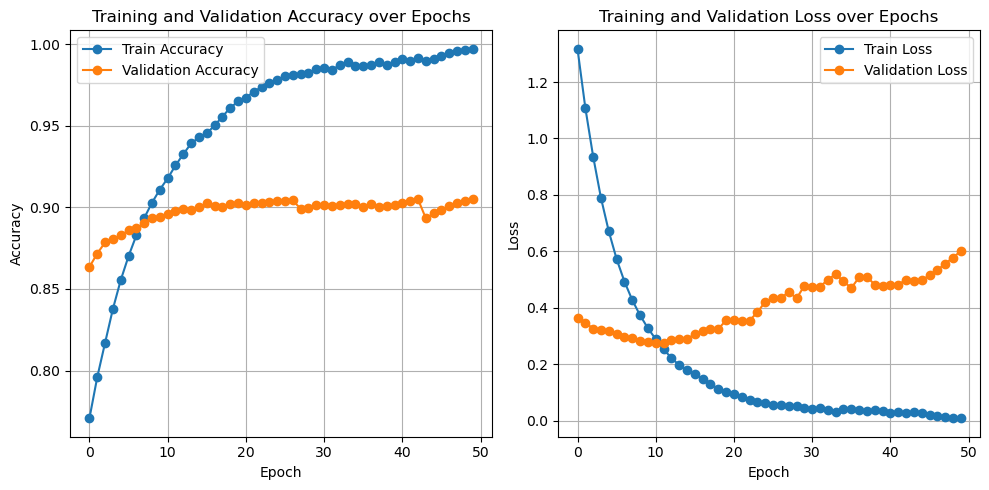

In [42]:
test_model_accuracy(model)

# Convolutional Model Building
### Convolutional Layer (32)
### Dense Layer (64)
### Dense Layer (32)
### Dense Layer (16)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(32, activation = 'relu'),
        Dense(16, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_2 (Flatten)         (None, 16992)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                1087552   
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 3)                 51        
                                                                 
Total params: 1,090,531
Trainable params: 1,090,531
No

In [17]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
350/350 [==============================] - 14s 38ms/step - loss: 2.1864 - accuracy: 0.3399 - val_loss: 1.0961 - val_accuracy: 0.3760
Epoch 2/50
350/350 [==============================] - 14s 39ms/step - loss: 1.0938 - accuracy: 0.3826 - val_loss: 1.0941 - val_accuracy: 0.3760
Epoch 3/50
350/350 [==============================] - 14s 39ms/step - loss: 1.0924 - accuracy: 0.3826 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 4/50
350/350 [==============================] - 14s 39ms/step - loss: 1.0922 - accuracy: 0.3826 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 5/50
350/350 [==============================] - 14s 39ms/step - loss: 1.0922 - accuracy: 0.3826 - val_loss: 1.0941 - val_accuracy: 0.3760
Epoch 6/50
350/350 [==============================] - 13s 38ms/step - loss: 1.0922 - accuracy: 0.3826 - val_loss: 1.0942 - val_accuracy: 0.3760
Epoch 7/50
350/350 [==============================] - 14s 39ms/step - loss: 1.0922 - accuracy: 0.3826 - val_loss: 1.0941 - val_accuracy:

110/110 [==============================] - 3s 30ms/step - loss: 1.0902 - accuracy: 0.3909
Test Accuracy: 39.0906%


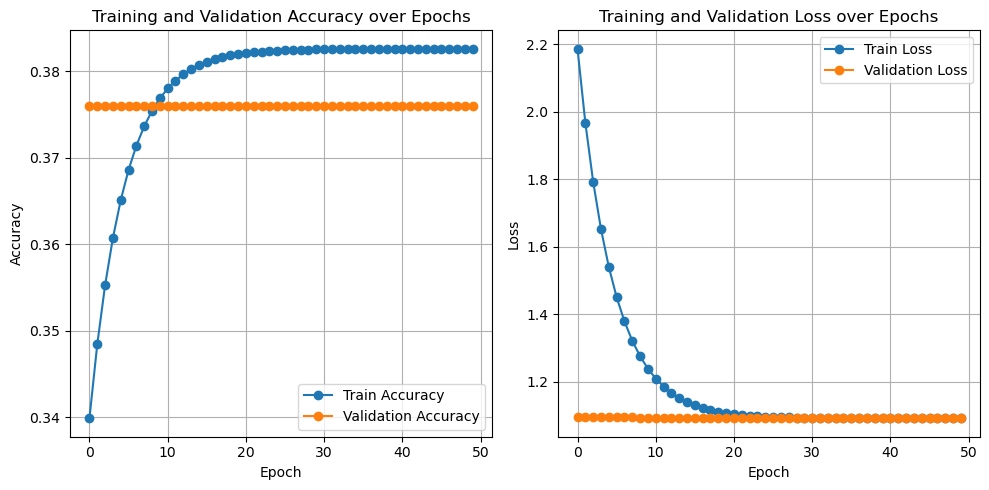

In [18]:
test_model_accuracy(model)

# Convolutional Model Building
## Convolutional Layer (32)
## Dense Layer (64)
## Dense Layer (64)
## Dense Layer (64)
## Dense Layer (64)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_3 (Flatten)         (None, 16992)             0         
                                                                 
 dense_13 (Dense)            (None, 64)                1087552   
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 3)                

In [20]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
350/350 [==============================] - 15s 39ms/step - loss: 0.9956 - accuracy: 0.6763 - val_loss: 0.3661 - val_accuracy: 0.8578
Epoch 2/50
350/350 [==============================] - 12s 35ms/step - loss: 0.3187 - accuracy: 0.8738 - val_loss: 0.3483 - val_accuracy: 0.8749
Epoch 3/50
350/350 [==============================] - 13s 37ms/step - loss: 0.3079 - accuracy: 0.8845 - val_loss: 0.3618 - val_accuracy: 0.8606
Epoch 4/50
350/350 [==============================] - 13s 38ms/step - loss: 0.2760 - accuracy: 0.8969 - val_loss: 0.4834 - val_accuracy: 0.7938
Epoch 5/50
350/350 [==============================] - 12s 36ms/step - loss: 0.3187 - accuracy: 0.8785 - val_loss: 0.2981 - val_accuracy: 0.8906
Epoch 6/50
350/350 [==============================] - 12s 35ms/step - loss: 0.2382 - accuracy: 0.9111 - val_loss: 0.2418 - val_accuracy: 0.9092
Epoch 7/50
350/350 [==============================] - 15s 43ms/step - loss: 0.2168 - accuracy: 0.9151 - val_loss: 0.2579 - val_accuracy:

110/110 [==============================] - 3s 27ms/step - loss: 0.3300 - accuracy: 0.8759
Test Accuracy: 87.5894%


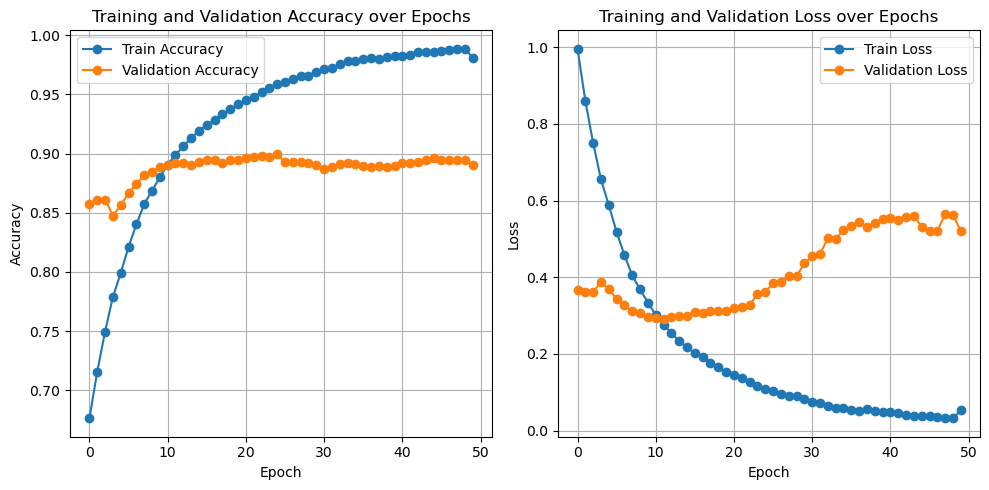

In [21]:
test_model_accuracy(model)

# Convolutional Model Building
## Convolutional Layer (32)
## Dense Layer (64)
## Dense Layer (64)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_4 (Flatten)         (None, 16992)             0         
                                                                 
 dense_18 (Dense)            (None, 64)                1087552   
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,092,227
Trainable params: 1,092,227
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
350/350 [==============================] - 16s 43ms/step - loss: 2.4162 - accuracy: 0.7380 - val_loss: 0.3409 - val_accuracy: 0.8721
Epoch 2/50
350/350 [==============================] - 13s 37ms/step - loss: 0.2782 - accuracy: 0.8954 - val_loss: 0.2987 - val_accuracy: 0.8863
Epoch 3/50
350/350 [==============================] - 13s 38ms/step - loss: 0.2357 - accuracy: 0.9116 - val_loss: 0.2966 - val_accuracy: 0.8985
Epoch 4/50
350/350 [==============================] - 13s 38ms/step - loss: 0.2106 - accuracy: 0.9186 - val_loss: 0.2699 - val_accuracy: 0.8974
Epoch 5/50
350/350 [==============================] - 12s 35ms/step - loss: 0.2059 - accuracy: 0.9208 - val_loss: 0.2493 - val_accuracy: 0.9110
Epoch 6/50
350/350 [==============================] - 13s 38ms/step - loss: 0.1747 - accuracy: 0.9330 - val_loss: 0.2294 - val_accuracy: 0.9210
Epoch 7/50
350/350 [==============================] - 14s 40ms/step - loss: 0.1737 - accuracy: 0.9310 - val_loss: 0.2231 - val_accuracy:

110/110 [==============================] - 3s 29ms/step - loss: 0.6194 - accuracy: 0.8982
Test Accuracy: 89.8198%


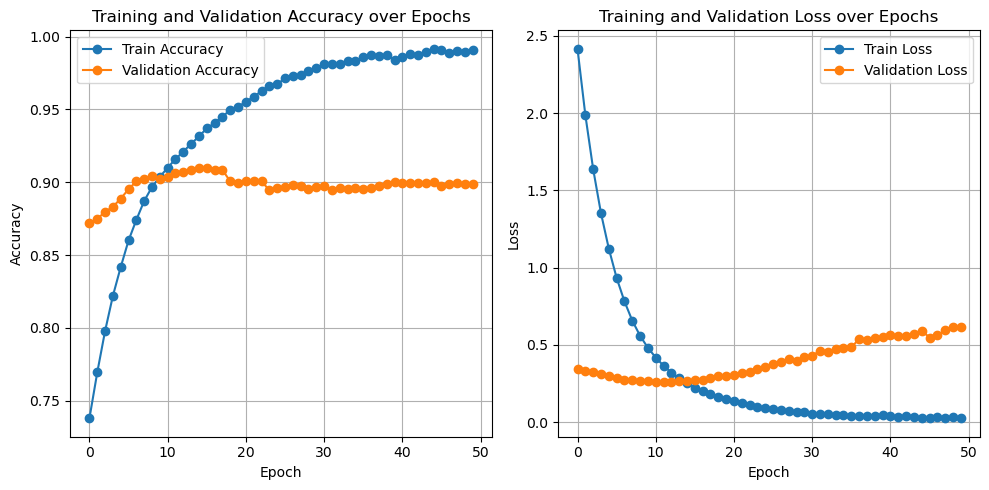

In [24]:
test_model_accuracy(model)

# Convolutional Model Building
## Convolutional Layer (32)
## Dense Layer (64)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_5 (Flatten)         (None, 16992)             0         
                                                                 
 dense_21 (Dense)            (None, 64)                1087552   
                                                                 
 dense_22 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,088,067
Trainable params: 1,088,067
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
350/350 [==============================] - 12s 34ms/step - loss: 6.0791 - accuracy: 0.6424 - val_loss: 0.3469 - val_accuracy: 0.8785
Epoch 2/50
350/350 [==============================] - 13s 37ms/step - loss: 0.2867 - accuracy: 0.8926 - val_loss: 0.2727 - val_accuracy: 0.8960
Epoch 3/50
350/350 [==============================] - 13s 36ms/step - loss: 0.2148 - accuracy: 0.9182 - val_loss: 0.2515 - val_accuracy: 0.9135
Epoch 4/50
350/350 [==============================] - 12s 35ms/step - loss: 0.1842 - accuracy: 0.9330 - val_loss: 0.2461 - val_accuracy: 0.9092
Epoch 5/50
350/350 [==============================] - 12s 34ms/step - loss: 0.1730 - accuracy: 0.9357 - val_loss: 0.3064 - val_accuracy: 0.9071
Epoch 6/50
350/350 [==============================] - 12s 36ms/step - loss: 0.1625 - accuracy: 0.9403 - val_loss: 0.3187 - val_accuracy: 0.8831
Epoch 7/50
350/350 [==============================] - 13s 38ms/step - loss: 0.1397 - accuracy: 0.9479 - val_loss: 0.2802 - val_accuracy:

110/110 [==============================] - 3s 23ms/step - loss: 0.5383 - accuracy: 0.9165
Test Accuracy: 91.6500%


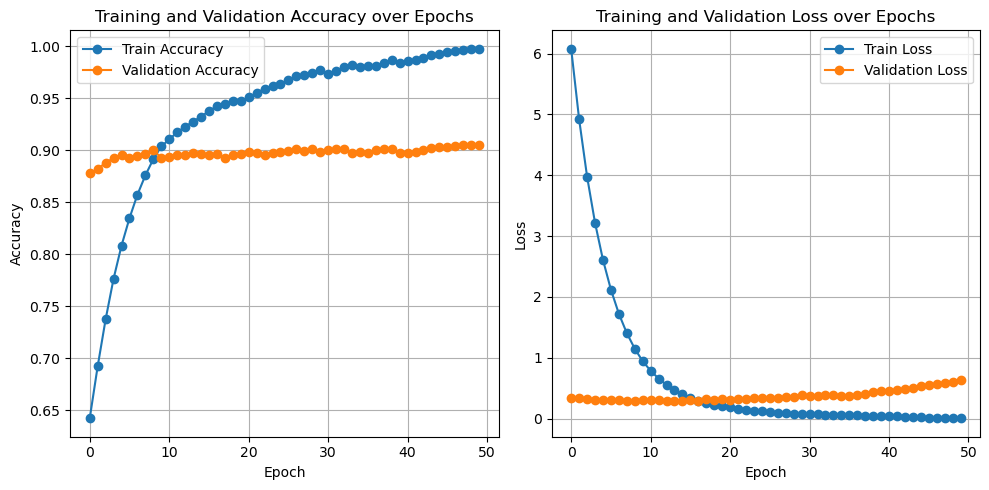

In [27]:
test_model_accuracy(model)

## Increasing the Batch Size to 32

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_6 (Flatten)         (None, 16992)             0         
                                                                 
 dense_23 (Dense)            (None, 64)                1087552   
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,096,387
Trainable params: 1,096,387
No

In [29]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=32)

Epoch 1/50
350/350 [==============================] - 19s 51ms/step - loss: 1.8477 - accuracy: 0.7461 - val_loss: 0.5331 - val_accuracy: 0.8102
Epoch 2/50
350/350 [==============================] - 19s 56ms/step - loss: 0.2627 - accuracy: 0.9005 - val_loss: 0.2628 - val_accuracy: 0.9096
Epoch 3/50
350/350 [==============================] - 17s 49ms/step - loss: 0.2405 - accuracy: 0.9077 - val_loss: 0.2778 - val_accuracy: 0.9014
Epoch 4/50
350/350 [==============================] - 18s 50ms/step - loss: 0.2174 - accuracy: 0.9169 - val_loss: 0.2474 - val_accuracy: 0.9089
Epoch 5/50
350/350 [==============================] - 16s 46ms/step - loss: 0.1942 - accuracy: 0.9258 - val_loss: 0.2435 - val_accuracy: 0.9117
Epoch 6/50
350/350 [==============================] - 20s 56ms/step - loss: 0.1810 - accuracy: 0.9302 - val_loss: 0.2615 - val_accuracy: 0.9028
Epoch 7/50
350/350 [==============================] - 17s 50ms/step - loss: 0.1676 - accuracy: 0.9357 - val_loss: 0.2519 - val_accuracy:

110/110 [==============================] - 3s 29ms/step - loss: 0.5295 - accuracy: 0.9051
Test Accuracy: 90.5061%


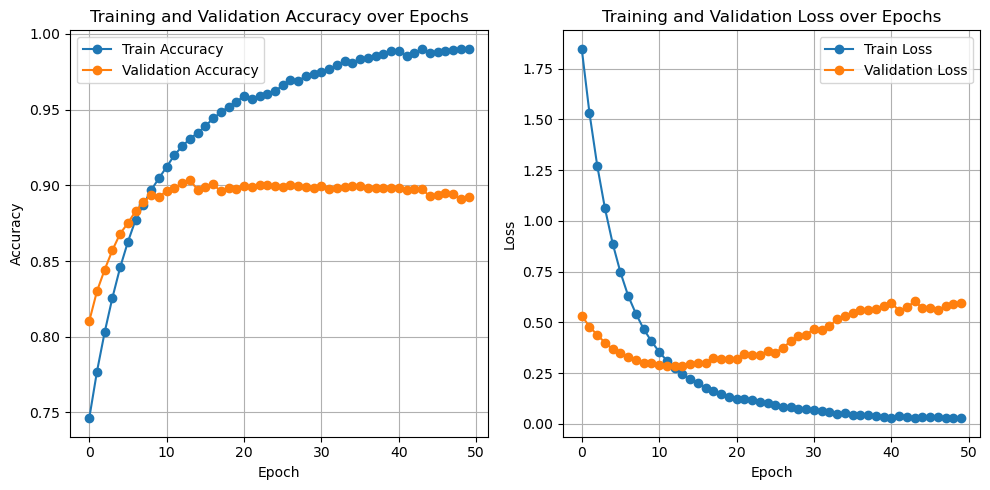

In [30]:
test_model_accuracy(model)

## Increasing the Batch Size to 64

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_7 (Flatten)         (None, 16992)             0         
                                                                 
 dense_27 (Dense)            (None, 64)                1087552   
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,096,387
Trainable params: 1,096,387
No

In [32]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 6s 29ms/step - loss: 4.7464 - accuracy: 0.5732 - val_loss: 0.4980 - val_accuracy: 0.8138
Epoch 2/50
175/175 [==============================] - 5s 28ms/step - loss: 0.3903 - accuracy: 0.8486 - val_loss: 0.2978 - val_accuracy: 0.8906
Epoch 3/50
175/175 [==============================] - 3s 20ms/step - loss: 0.2925 - accuracy: 0.8884 - val_loss: 0.3210 - val_accuracy: 0.8599
Epoch 4/50
175/175 [==============================] - 4s 24ms/step - loss: 0.2644 - accuracy: 0.8988 - val_loss: 0.2470 - val_accuracy: 0.9117
Epoch 5/50
175/175 [==============================] - 5s 30ms/step - loss: 0.2296 - accuracy: 0.9143 - val_loss: 0.2621 - val_accuracy: 0.9046
Epoch 6/50
175/175 [==============================] - 5s 30ms/step - loss: 0.2103 - accuracy: 0.9191 - val_loss: 0.2532 - val_accuracy: 0.9085
Epoch 7/50
175/175 [==============================] - 5s 31ms/step - loss: 0.2032 - accuracy: 0.9241 - val_loss: 0.2370 - val_accuracy: 0.9121

110/110 [==============================] - 3s 29ms/step - loss: 0.5005 - accuracy: 0.9185
Test Accuracy: 91.8502%


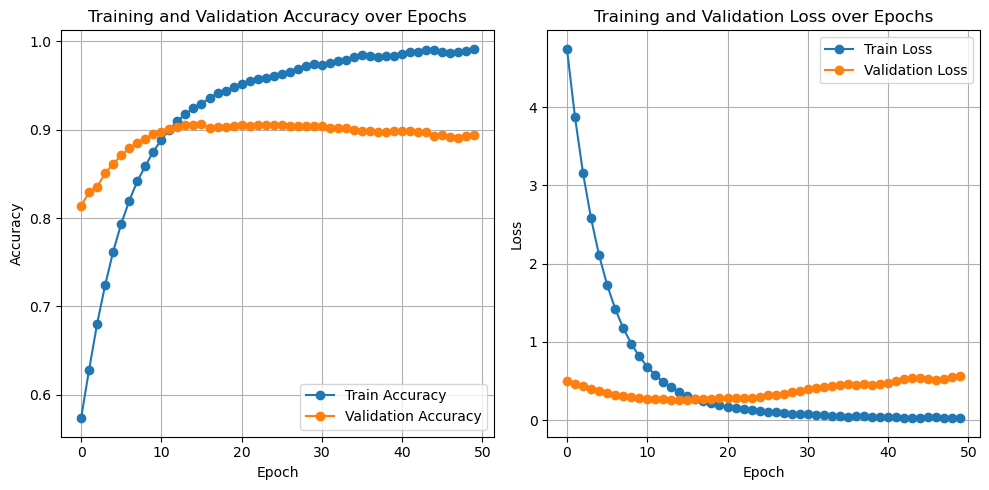

In [33]:
test_model_accuracy(model)

## Increasing the Batch Size to 128

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_8 (Flatten)         (None, 16992)             0         
                                                                 
 dense_31 (Dense)            (None, 64)                1087552   
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dense_34 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,096,387
Trainable params: 1,096,387
No

In [35]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=128)

Epoch 1/50
88/88 [==============================] - 6s 31ms/step - loss: 7.7767 - accuracy: 0.3971 - val_loss: 0.7378 - val_accuracy: 0.6926
Epoch 2/50
88/88 [==============================] - 3s 29ms/step - loss: 0.5167 - accuracy: 0.8114 - val_loss: 0.3885 - val_accuracy: 0.8699
Epoch 3/50
88/88 [==============================] - 3s 32ms/step - loss: 0.4180 - accuracy: 0.8371 - val_loss: 0.3460 - val_accuracy: 0.8728
Epoch 4/50
88/88 [==============================] - 3s 37ms/step - loss: 0.2967 - accuracy: 0.8871 - val_loss: 0.3545 - val_accuracy: 0.8713
Epoch 5/50
88/88 [==============================] - 3s 37ms/step - loss: 0.2770 - accuracy: 0.8925 - val_loss: 0.2864 - val_accuracy: 0.8985
Epoch 6/50
88/88 [==============================] - 3s 35ms/step - loss: 0.2487 - accuracy: 0.9080 - val_loss: 0.2701 - val_accuracy: 0.9067
Epoch 7/50
88/88 [==============================] - 3s 39ms/step - loss: 0.2568 - accuracy: 0.9011 - val_loss: 0.2783 - val_accuracy: 0.9028
Epoch 8/50
88

110/110 [==============================] - 4s 32ms/step - loss: 0.5384 - accuracy: 0.8910
Test Accuracy: 89.1049%


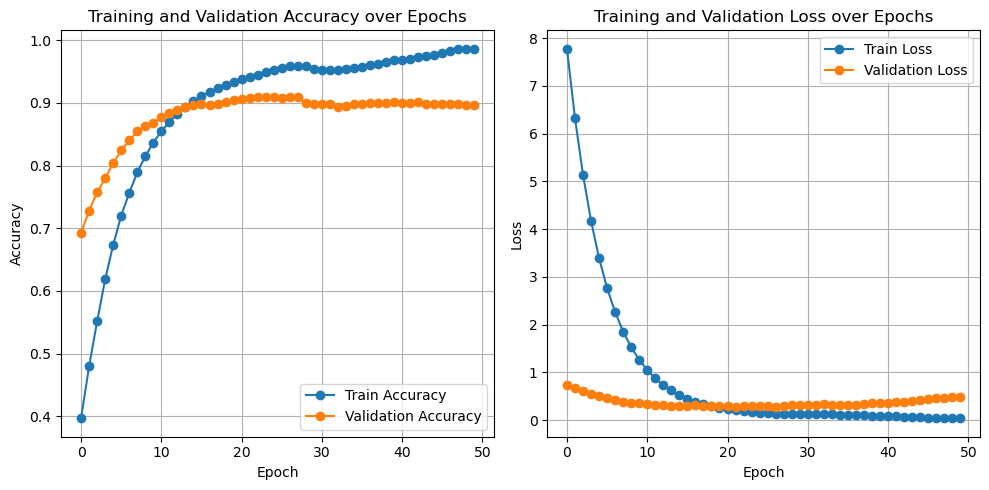

In [36]:
test_model_accuracy(model)

## Lowering the Batch Size to 16

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 9, 59, 32)         320       
                                                                 
 flatten_9 (Flatten)         (None, 16992)             0         
                                                                 
 dense_35 (Dense)            (None, 64)                1087552   
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,096,387
Trainable params: 1,096,387
N

In [38]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=16)

Epoch 1/50
700/700 [==============================] - 26s 36ms/step - loss: 0.9028 - accuracy: 0.8057 - val_loss: 0.3811 - val_accuracy: 0.8549
Epoch 2/50
700/700 [==============================] - 27s 38ms/step - loss: 0.2843 - accuracy: 0.8928 - val_loss: 0.3834 - val_accuracy: 0.8420
Epoch 3/50
700/700 [==============================] - 25s 36ms/step - loss: 0.2574 - accuracy: 0.9038 - val_loss: 0.2725 - val_accuracy: 0.9028
Epoch 4/50
700/700 [==============================] - 27s 38ms/step - loss: 0.2577 - accuracy: 0.9040 - val_loss: 0.3095 - val_accuracy: 0.8939
Epoch 5/50
700/700 [==============================] - 25s 36ms/step - loss: 0.2358 - accuracy: 0.9094 - val_loss: 0.3137 - val_accuracy: 0.8760
Epoch 6/50
700/700 [==============================] - 25s 36ms/step - loss: 0.2084 - accuracy: 0.9207 - val_loss: 0.3177 - val_accuracy: 0.8831
Epoch 7/50
700/700 [==============================] - 26s 37ms/step - loss: 0.1900 - accuracy: 0.9232 - val_loss: 0.2788 - val_accuracy:

110/110 [==============================] - 3s 29ms/step - loss: 0.7060 - accuracy: 0.8948
Test Accuracy: 89.4767%


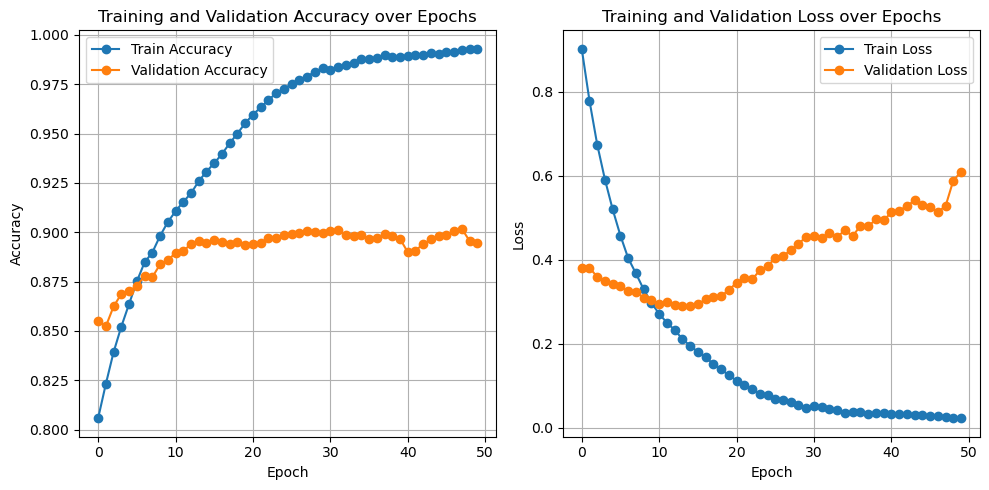

In [39]:
test_model_accuracy(model)

## Lowering the Batch Size to 8 

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 flatten_11 (Flatten)        (None, 16992)             0         
                                                                 
 dense_43 (Dense)            (None, 64)                1087552   
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dense_45 (Dense)            (None, 64)                4160      
                                                                 
 dense_46 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,096,387
Trainable params: 1,096,387
N

In [45]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=8)

Epoch 1/50
1399/1399 [==============================] - 50s 36ms/step - loss: 0.4503 - accuracy: 0.8212 - val_loss: 0.3488 - val_accuracy: 0.8703
Epoch 2/50
1399/1399 [==============================] - 51s 36ms/step - loss: 0.3227 - accuracy: 0.8740 - val_loss: 0.2980 - val_accuracy: 0.8917
Epoch 3/50
1399/1399 [==============================] - 52s 37ms/step - loss: 0.2763 - accuracy: 0.8944 - val_loss: 0.2684 - val_accuracy: 0.9024
Epoch 4/50
1399/1399 [==============================] - 51s 37ms/step - loss: 0.2502 - accuracy: 0.9045 - val_loss: 0.2881 - val_accuracy: 0.8910
Epoch 5/50
1399/1399 [==============================] - 51s 37ms/step - loss: 0.2355 - accuracy: 0.9077 - val_loss: 0.2635 - val_accuracy: 0.8996
Epoch 6/50
1399/1399 [==============================] - 49s 35ms/step - loss: 0.2049 - accuracy: 0.9192 - val_loss: 0.2919 - val_accuracy: 0.8989
Epoch 7/50
1399/1399 [==============================] - 50s 36ms/step - loss: 0.1911 - accuracy: 0.9243 - val_loss: 0.2784 -

110/110 [==============================] - 2s 21ms/step - loss: 0.6220 - accuracy: 0.8788
Test Accuracy: 87.8753%


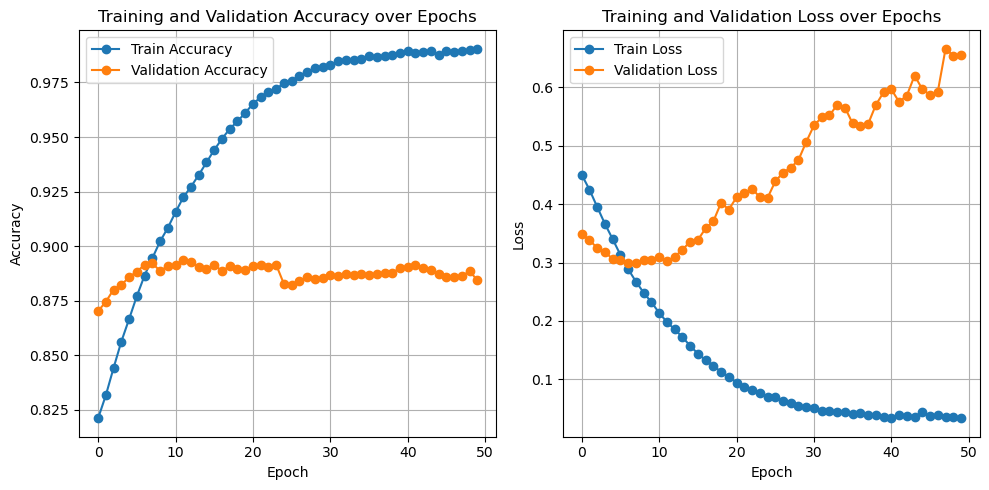

In [46]:
test_model_accuracy(model)

## Lowering the Batch Size to 4 (It is important 13988/ 4 dividable)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 flatten_12 (Flatten)        (None, 16992)             0         
                                                                 
 dense_47 (Dense)            (None, 64)                1087552   
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,096,387
Trainable params: 1,096,387
N

In [48]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=4)

Epoch 1/50
2798/2798 [==============================] - 24s 8ms/step - loss: 1.0268 - accuracy: 0.7891 - val_loss: 0.3222 - val_accuracy: 0.8821
Epoch 2/50
2798/2798 [==============================] - 24s 8ms/step - loss: 0.3107 - accuracy: 0.8783 - val_loss: 0.3374 - val_accuracy: 0.8849
Epoch 3/50
2798/2798 [==============================] - 24s 8ms/step - loss: 0.3249 - accuracy: 0.8718 - val_loss: 0.3146 - val_accuracy: 0.8803
Epoch 4/50
2798/2798 [==============================] - 23s 8ms/step - loss: 0.2884 - accuracy: 0.8863 - val_loss: 0.3067 - val_accuracy: 0.8881
Epoch 5/50
2798/2798 [==============================] - 22s 8ms/step - loss: 0.2792 - accuracy: 0.8920 - val_loss: 0.3283 - val_accuracy: 0.8746
Epoch 6/50
2798/2798 [==============================] - 22s 8ms/step - loss: 0.2514 - accuracy: 0.9004 - val_loss: 0.3415 - val_accuracy: 0.8738
Epoch 7/50
2798/2798 [==============================] - 22s 8ms/step - loss: 0.2243 - accuracy: 0.9113 - val_loss: 0.4127 - val_ac

110/110 [==============================] - 2s 19ms/step - loss: 0.7933 - accuracy: 0.8865
Test Accuracy: 88.6474%


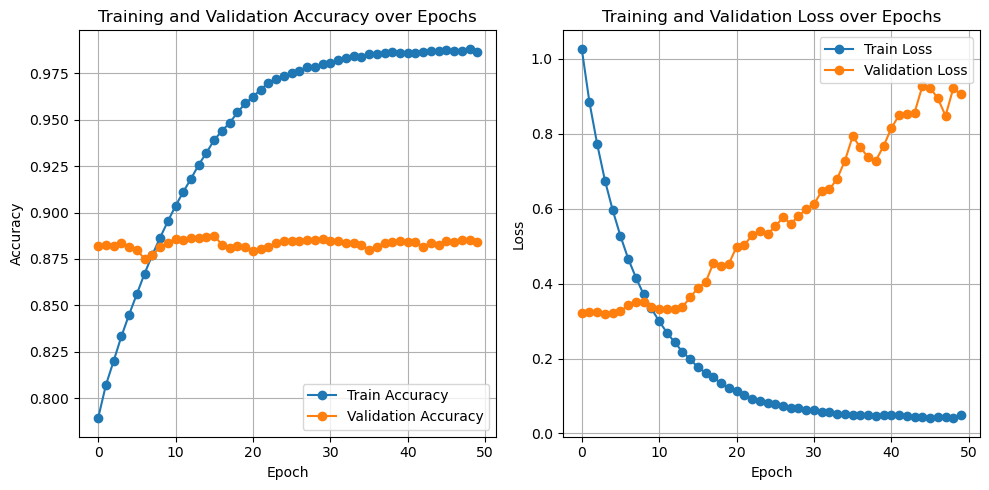

In [49]:
test_model_accuracy(model)

# Adding a Max Pooling Layer

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        MaxPooling2D(2,2),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 29, 32)        0         
 2D)                                                             
                                                                 
 flatten_14 (Flatten)        (None, 3712)              0         
                                                                 
 dense_55 (Dense)            (None, 64)                237632    
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                     

In [54]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 3s 13ms/step - loss: 1.3038 - accuracy: 0.4847 - val_loss: 0.7538 - val_accuracy: 0.6004
Epoch 2/50
175/175 [==============================] - 2s 13ms/step - loss: 0.5497 - accuracy: 0.7789 - val_loss: 0.4101 - val_accuracy: 0.8331
Epoch 3/50
175/175 [==============================] - 2s 12ms/step - loss: 0.3458 - accuracy: 0.8662 - val_loss: 0.3004 - val_accuracy: 0.8846
Epoch 4/50
175/175 [==============================] - 3s 15ms/step - loss: 0.2782 - accuracy: 0.8920 - val_loss: 0.2669 - val_accuracy: 0.8956
Epoch 5/50
175/175 [==============================] - 3s 16ms/step - loss: 0.2542 - accuracy: 0.8993 - val_loss: 0.2655 - val_accuracy: 0.8978
Epoch 6/50
175/175 [==============================] - 2s 12ms/step - loss: 0.2416 - accuracy: 0.9055 - val_loss: 0.2592 - val_accuracy: 0.9039
Epoch 7/50
175/175 [==============================] - 2s 14ms/step - loss: 0.2902 - accuracy: 0.8874 - val_loss: 0.2783 - val_accuracy: 0.8946

110/110 [==============================] - 1s 4ms/step - loss: 0.3790 - accuracy: 0.9119
Test Accuracy: 91.1924%


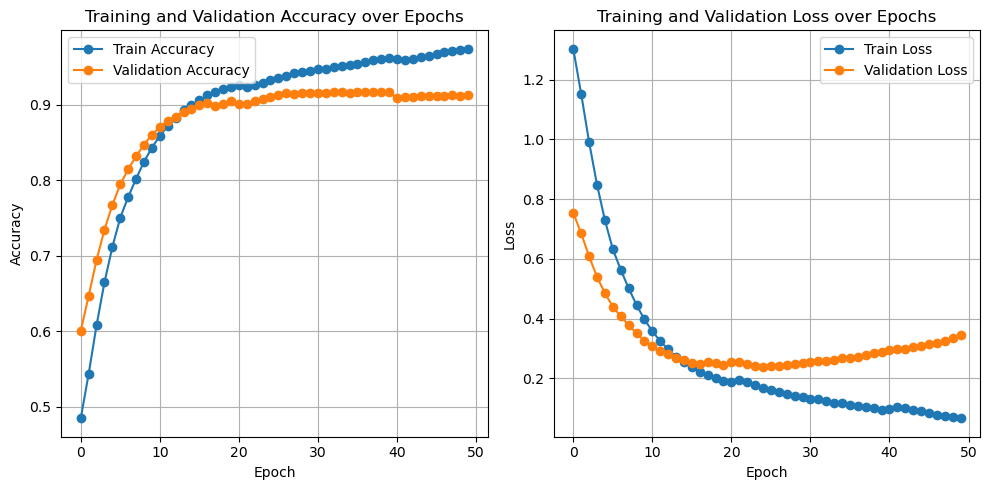

In [55]:
test_model_accuracy(model)

## Adding an Average Pooling Layer

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d (AverageP  (None, 4, 29, 32)        0         
 ooling2D)                                                       
                                                                 
 flatten_15 (Flatten)        (None, 3712)              0         
                                                                 
 dense_59 (Dense)            (None, 64)                237632    
                                                                 
 dense_60 (Dense)            (None, 64)                4160      
                                                                 
 dense_61 (Dense)            (None, 64)                4160      
                                                     

In [59]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 3s 13ms/step - loss: 1.6123 - accuracy: 0.6092 - val_loss: 0.5236 - val_accuracy: 0.7277
Epoch 2/50
175/175 [==============================] - 2s 13ms/step - loss: 0.4444 - accuracy: 0.8205 - val_loss: 0.3772 - val_accuracy: 0.8731
Epoch 3/50
175/175 [==============================] - 2s 14ms/step - loss: 0.3489 - accuracy: 0.8623 - val_loss: 0.3181 - val_accuracy: 0.8867
Epoch 4/50
175/175 [==============================] - 3s 15ms/step - loss: 0.3307 - accuracy: 0.8699 - val_loss: 0.4586 - val_accuracy: 0.7852
Epoch 5/50
175/175 [==============================] - 2s 12ms/step - loss: 0.2919 - accuracy: 0.8863 - val_loss: 0.3292 - val_accuracy: 0.8599
Epoch 6/50
175/175 [==============================] - 2s 12ms/step - loss: 0.2749 - accuracy: 0.8935 - val_loss: 0.2563 - val_accuracy: 0.9028
Epoch 7/50
175/175 [==============================] - 2s 12ms/step - loss: 0.2519 - accuracy: 0.9005 - val_loss: 0.2968 - val_accuracy: 0.8721

110/110 [==============================] - 1s 7ms/step - loss: 0.2205 - accuracy: 0.9242
Test Accuracy: 92.4221%


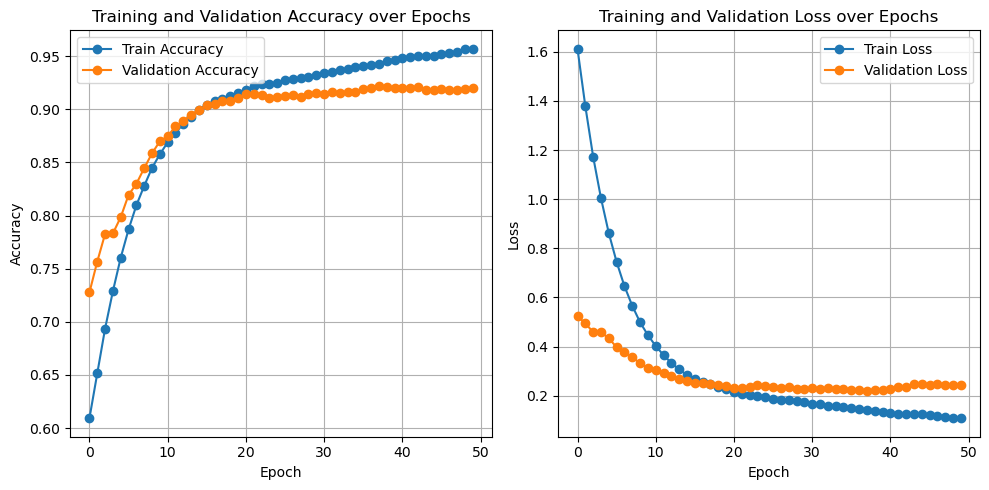

In [60]:
test_model_accuracy(model)

## Batch Normalization

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Batch Normalization
        BatchNormalization(),
        Activation('relu'),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 batch_normalization (BatchN  (None, 9, 59, 32)        128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 9, 59, 32)         0         
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 29, 32)        0         
 ePooling2D)                                                     
                                                                 
 flatten_16 (Flatten)        (None, 3712)              0         
                                                                 
 dense_63 (Dense)            (None, 64)              

In [63]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 6s 29ms/step - loss: 0.3734 - accuracy: 0.8439 - val_loss: 1.1116 - val_accuracy: 0.6115
Epoch 2/50
175/175 [==============================] - 3s 19ms/step - loss: 0.2009 - accuracy: 0.9206 - val_loss: 1.9666 - val_accuracy: 0.5361
Epoch 3/50
175/175 [==============================] - 3s 18ms/step - loss: 0.1706 - accuracy: 0.9306 - val_loss: 6.4967 - val_accuracy: 0.3781
Epoch 4/50
175/175 [==============================] - 3s 20ms/step - loss: 0.1600 - accuracy: 0.9346 - val_loss: 0.9018 - val_accuracy: 0.7466
Epoch 5/50
175/175 [==============================] - 3s 18ms/step - loss: 0.1364 - accuracy: 0.9465 - val_loss: 9.3517 - val_accuracy: 0.3506
Epoch 6/50
175/175 [==============================] - 3s 18ms/step - loss: 0.1206 - accuracy: 0.9519 - val_loss: 0.6458 - val_accuracy: 0.8009
Epoch 7/50
175/175 [==============================] - 4s 21ms/step - loss: 0.1183 - accuracy: 0.9527 - val_loss: 5.8720 - val_accuracy: 0.5300

110/110 [==============================] - 1s 11ms/step - loss: 0.3052 - accuracy: 0.9420
Test Accuracy: 94.1950%


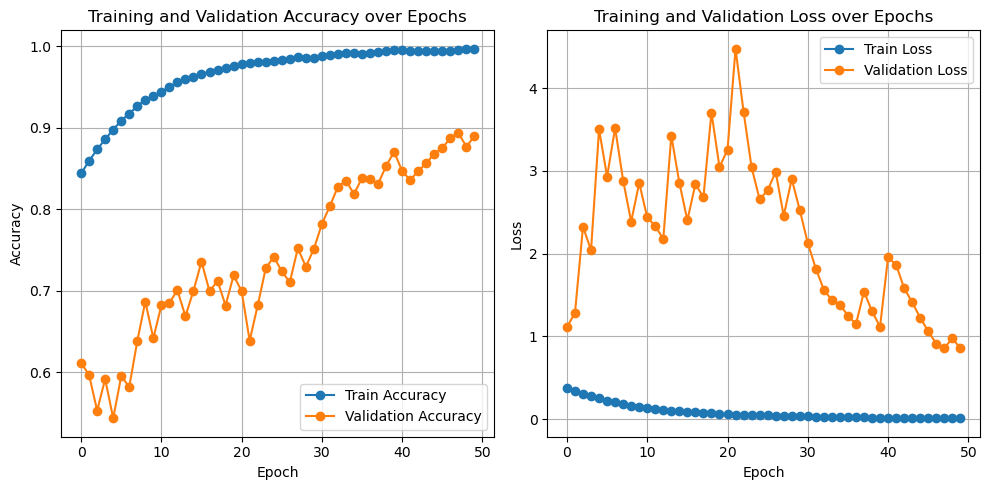

In [64]:
test_model_accuracy(model)

## Batch Normalization with Max Pooling Layers

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),
        
        #Added Batch Normalization
        BatchNormalization(),
        Activation('relu'),

        #Added Pooling Layer
        MaxPooling2D(2,2),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 batch_normalization_1 (Batc  (None, 9, 59, 32)        128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 9, 59, 32)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 29, 32)        0         
 2D)                                                             
                                                                 
 flatten_17 (Flatten)        (None, 3712)              0         
                                                                 
 dense_67 (Dense)            (None, 64)              

In [66]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 20ms/step - loss: 0.3683 - accuracy: 0.8487 - val_loss: 2.3298 - val_accuracy: 0.4335
Epoch 2/50
175/175 [==============================] - 3s 16ms/step - loss: 0.2078 - accuracy: 0.9190 - val_loss: 1.3873 - val_accuracy: 0.6204
Epoch 3/50
175/175 [==============================] - 3s 16ms/step - loss: 0.1637 - accuracy: 0.9353 - val_loss: 0.3533 - val_accuracy: 0.8721
Epoch 4/50
175/175 [==============================] - 3s 19ms/step - loss: 0.1462 - accuracy: 0.9419 - val_loss: 0.5682 - val_accuracy: 0.8117
Epoch 5/50
175/175 [==============================] - 3s 18ms/step - loss: 0.1240 - accuracy: 0.9509 - val_loss: 3.9106 - val_accuracy: 0.3846
Epoch 6/50
175/175 [==============================] - 3s 19ms/step - loss: 0.1429 - accuracy: 0.9450 - val_loss: 0.3844 - val_accuracy: 0.8681
Epoch 7/50
175/175 [==============================] - 2s 13ms/step - loss: 0.1362 - accuracy: 0.9472 - val_loss: 1.2506 - val_accuracy: 0.6419

110/110 [==============================] - 1s 5ms/step - loss: 1.6488 - accuracy: 0.8181
Test Accuracy: 81.8130%


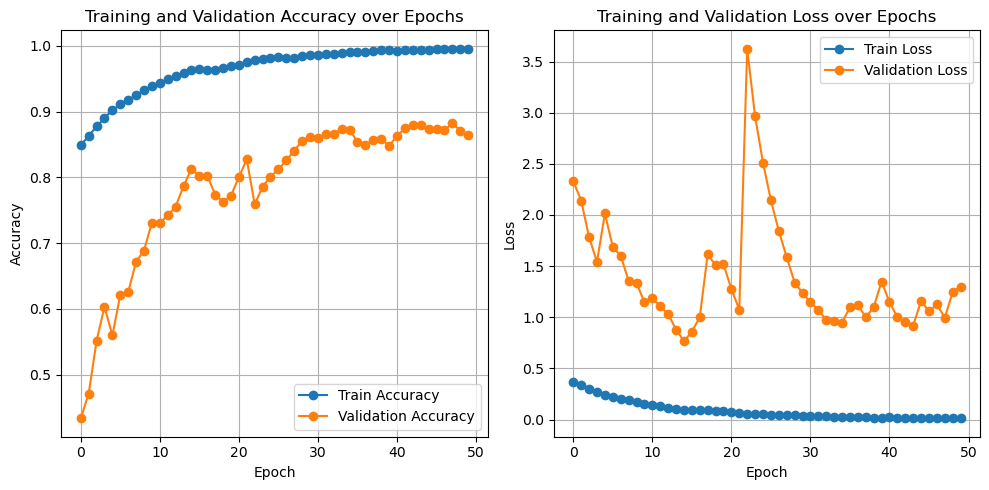

In [67]:
test_model_accuracy(model)

## Adding More Pooling and Convolutional Layers

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_2 (Averag  (None, 4, 29, 32)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_19 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_3 (Averag  (None, 1, 13, 64)        0         
 ePooling2D)                                                     
                                                                 
 flatten_18 (Flatten)        (None, 832)               0         
                                                                 
 dense_71 (Dense)            (None, 64)              

In [69]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 3s 14ms/step - loss: 1.1238 - accuracy: 0.4645 - val_loss: 0.8377 - val_accuracy: 0.5919
Epoch 2/50
175/175 [==============================] - 2s 10ms/step - loss: 0.7192 - accuracy: 0.6563 - val_loss: 0.6063 - val_accuracy: 0.7484
Epoch 3/50
175/175 [==============================] - 2s 13ms/step - loss: 0.5412 - accuracy: 0.7706 - val_loss: 0.4434 - val_accuracy: 0.8370
Epoch 4/50
175/175 [==============================] - 2s 12ms/step - loss: 0.4354 - accuracy: 0.8292 - val_loss: 0.4349 - val_accuracy: 0.8288
Epoch 5/50
175/175 [==============================] - 2s 14ms/step - loss: 0.3635 - accuracy: 0.8601 - val_loss: 0.3232 - val_accuracy: 0.8842
Epoch 6/50
175/175 [==============================] - 2s 11ms/step - loss: 0.3140 - accuracy: 0.8846 - val_loss: 0.3075 - val_accuracy: 0.8831
Epoch 7/50
175/175 [==============================] - 2s 13ms/step - loss: 0.3005 - accuracy: 0.8840 - val_loss: 0.2611 - val_accuracy: 0.9074

110/110 [==============================] - 0s 3ms/step - loss: 0.1922 - accuracy: 0.9348
Test Accuracy: 93.4801%


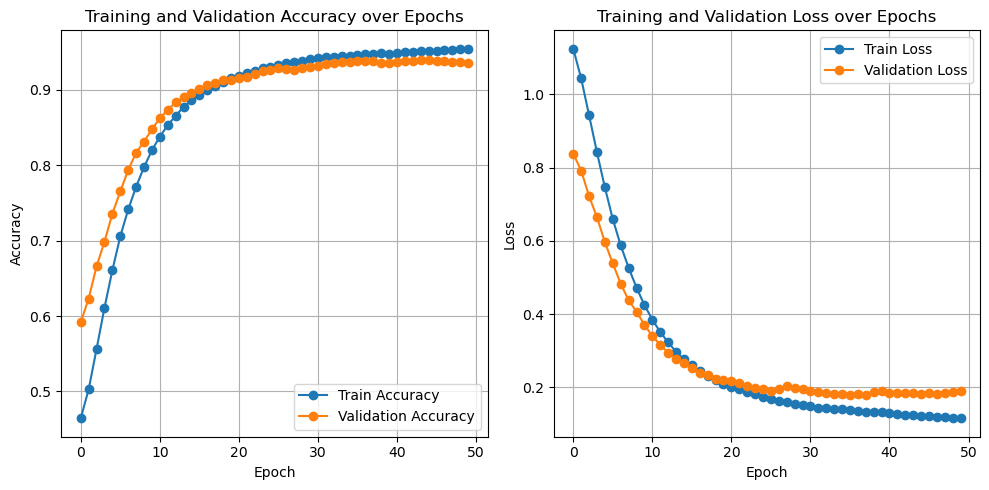

In [70]:
test_model_accuracy(model)

## Training with 100 epochs

In [71]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2,batch_size=64)

Epoch 1/100
175/175 [==============================] - 3s 16ms/step - loss: 0.1169 - accuracy: 0.9553 - val_loss: 0.1902 - val_accuracy: 0.9328
Epoch 2/100
175/175 [==============================] - 2s 14ms/step - loss: 0.1077 - accuracy: 0.9579 - val_loss: 0.1845 - val_accuracy: 0.9392
Epoch 3/100
175/175 [==============================] - 2s 13ms/step - loss: 0.1096 - accuracy: 0.9567 - val_loss: 0.1809 - val_accuracy: 0.9407
Epoch 4/100
175/175 [==============================] - 3s 16ms/step - loss: 0.1052 - accuracy: 0.9601 - val_loss: 0.1809 - val_accuracy: 0.9414
Epoch 5/100
175/175 [==============================] - 2s 12ms/step - loss: 0.0995 - accuracy: 0.9610 - val_loss: 0.1921 - val_accuracy: 0.9378
Epoch 6/100
175/175 [==============================] - 3s 16ms/step - loss: 0.1055 - accuracy: 0.9596 - val_loss: 0.2080 - val_accuracy: 0.9382
Epoch 7/100
175/175 [==============================] - 3s 15ms/step - loss: 0.1088 - accuracy: 0.9576 - val_loss: 0.2118 - val_accuracy:

110/110 [==============================] - 1s 7ms/step - loss: 0.6824 - accuracy: 0.9302
Test Accuracy: 93.0226%


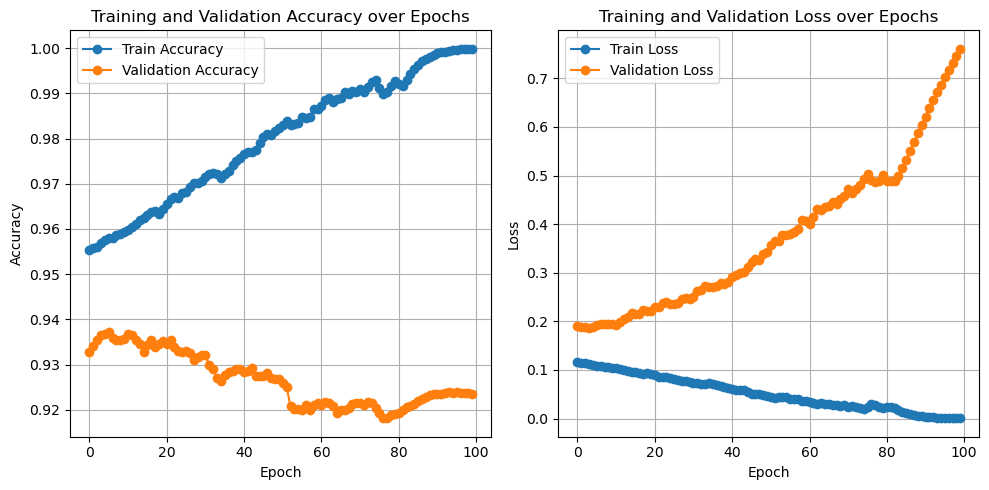

In [72]:
test_model_accuracy(model)

## Adding a Dropout Layer

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_13 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_30 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_14 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout (Dropout)           (None, 1, 13, 64)         0         
                                                                 
 flatten_22 (Flatten)        (None, 832)             

In [78]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 6s 15ms/step - loss: 1.2532 - accuracy: 0.3936 - val_loss: 0.9581 - val_accuracy: 0.5801
Epoch 2/50
175/175 [==============================] - 3s 15ms/step - loss: 0.7866 - accuracy: 0.6242 - val_loss: 0.6218 - val_accuracy: 0.6719
Epoch 3/50
175/175 [==============================] - 2s 11ms/step - loss: 0.5891 - accuracy: 0.7375 - val_loss: 0.5186 - val_accuracy: 0.7477
Epoch 4/50
175/175 [==============================] - 3s 18ms/step - loss: 0.5134 - accuracy: 0.7682 - val_loss: 0.4025 - val_accuracy: 0.8413
Epoch 5/50
175/175 [==============================] - 2s 14ms/step - loss: 0.4821 - accuracy: 0.7948 - val_loss: 0.4381 - val_accuracy: 0.8299
Epoch 6/50
175/175 [==============================] - 3s 16ms/step - loss: 0.4435 - accuracy: 0.8122 - val_loss: 0.4562 - val_accuracy: 0.8310
Epoch 7/50
175/175 [==============================] - 2s 13ms/step - loss: 0.4150 - accuracy: 0.8226 - val_loss: 0.3675 - val_accuracy: 0.8613

110/110 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9248
Test Accuracy: 92.4793%


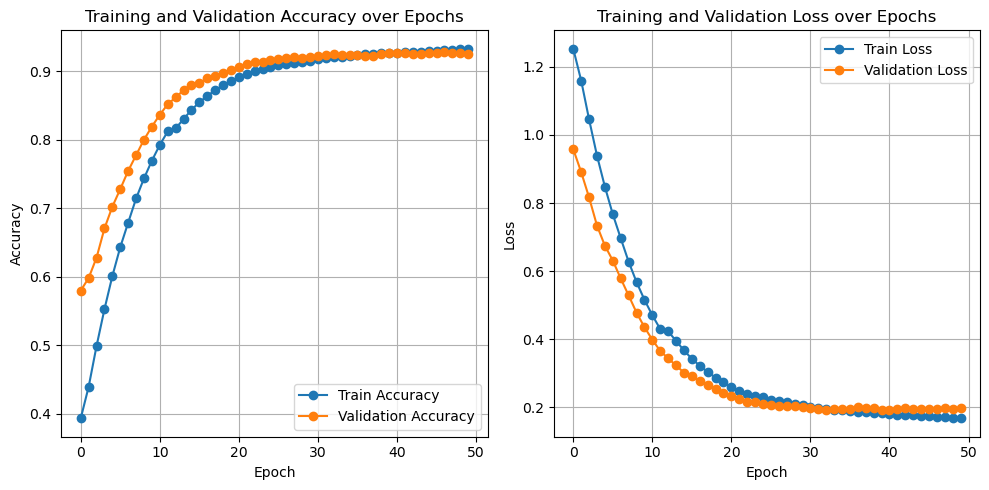

In [79]:
test_model_accuracy(model)

## Testing Dropout Layer Added Model with 100 Epochs

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_17 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_18 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_2 (Dropout)         (None, 1, 13, 64)         0         
                                                                 
 flatten_24 (Flatten)        (None, 832)             

In [83]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2,batch_size=64)

Epoch 1/100
175/175 [==============================] - 3s 13ms/step - loss: 1.2230 - accuracy: 0.4221 - val_loss: 0.8614 - val_accuracy: 0.5897
Epoch 2/100
175/175 [==============================] - 2s 13ms/step - loss: 0.8301 - accuracy: 0.5996 - val_loss: 0.7969 - val_accuracy: 0.6129
Epoch 3/100
175/175 [==============================] - 3s 15ms/step - loss: 0.7124 - accuracy: 0.6804 - val_loss: 0.6116 - val_accuracy: 0.7366
Epoch 4/100
175/175 [==============================] - 3s 17ms/step - loss: 0.6327 - accuracy: 0.7178 - val_loss: 0.5541 - val_accuracy: 0.7963
Epoch 5/100
175/175 [==============================] - 2s 12ms/step - loss: 0.5922 - accuracy: 0.7302 - val_loss: 0.4904 - val_accuracy: 0.8027
Epoch 6/100
175/175 [==============================] - 3s 14ms/step - loss: 0.5304 - accuracy: 0.7753 - val_loss: 0.4397 - val_accuracy: 0.8259
Epoch 7/100
175/175 [==============================] - 2s 11ms/step - loss: 0.4986 - accuracy: 0.7868 - val_loss: 0.4254 - val_accuracy:

110/110 [==============================] - 1s 5ms/step - loss: 0.1743 - accuracy: 0.9328
Test Accuracy: 93.2800%


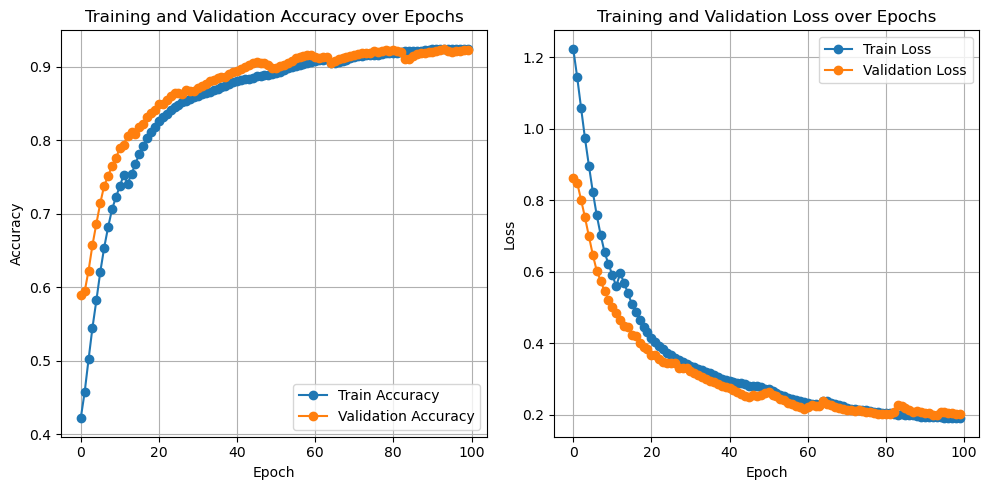

In [84]:
test_model_accuracy(model)

## Testing Dropout Layer Added Model with 150 Epochs

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_19 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_36 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_20 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_3 (Dropout)         (None, 1, 13, 64)         0         
                                                                 
 flatten_25 (Flatten)        (None, 832)             

In [86]:
history = model.fit(x_train, y_train, epochs=150, validation_split=0.2,batch_size=64)

Epoch 1/150
175/175 [==============================] - 4s 18ms/step - loss: 1.2402 - accuracy: 0.4226 - val_loss: 0.8844 - val_accuracy: 0.6869
Epoch 2/150
175/175 [==============================] - 2s 13ms/step - loss: 0.8881 - accuracy: 0.5516 - val_loss: 0.6762 - val_accuracy: 0.6887
Epoch 3/150
175/175 [==============================] - 2s 14ms/step - loss: 0.6861 - accuracy: 0.6695 - val_loss: 0.6164 - val_accuracy: 0.7141
Epoch 4/150
175/175 [==============================] - 2s 12ms/step - loss: 0.5881 - accuracy: 0.7267 - val_loss: 0.5542 - val_accuracy: 0.7209
Epoch 5/150
175/175 [==============================] - 2s 12ms/step - loss: 0.5529 - accuracy: 0.7481 - val_loss: 0.4802 - val_accuracy: 0.8038
Epoch 6/150
175/175 [==============================] - 2s 13ms/step - loss: 0.4928 - accuracy: 0.7786 - val_loss: 0.3980 - val_accuracy: 0.8520
Epoch 7/150
175/175 [==============================] - 2s 12ms/step - loss: 0.4733 - accuracy: 0.7893 - val_loss: 0.3754 - val_accuracy:

110/110 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9359
Test Accuracy: 93.5945%


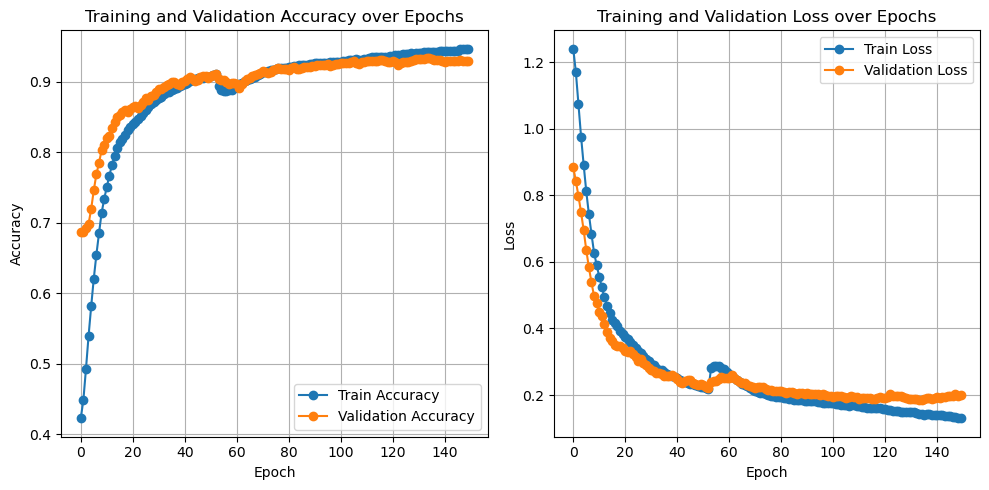

In [87]:
test_model_accuracy(model)

## Testing Dropout Layer Added Model with 500 Epochs

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_21 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_38 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_22 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_4 (Dropout)         (None, 1, 13, 64)         0         
                                                                 
 flatten_26 (Flatten)        (None, 832)             

In [89]:
history = model.fit(x_train, y_train, epochs=500, validation_split=0.2,batch_size=64)

Epoch 1/500
175/175 [==============================] - 4s 14ms/step - loss: 1.1064 - accuracy: 0.4771 - val_loss: 0.6016 - val_accuracy: 0.7848
Epoch 2/500
175/175 [==============================] - 3s 15ms/step - loss: 0.5096 - accuracy: 0.7848 - val_loss: 0.3892 - val_accuracy: 0.8535
Epoch 3/500
175/175 [==============================] - 2s 14ms/step - loss: 0.4073 - accuracy: 0.8300 - val_loss: 0.3964 - val_accuracy: 0.8352
Epoch 4/500
175/175 [==============================] - 2s 13ms/step - loss: 0.3941 - accuracy: 0.8366 - val_loss: 0.3336 - val_accuracy: 0.8678
Epoch 5/500
175/175 [==============================] - 2s 11ms/step - loss: 0.3412 - accuracy: 0.8587 - val_loss: 0.3106 - val_accuracy: 0.8703
Epoch 6/500
175/175 [==============================] - 3s 15ms/step - loss: 0.3052 - accuracy: 0.8756 - val_loss: 0.2562 - val_accuracy: 0.8985
Epoch 7/500
175/175 [==============================] - 2s 11ms/step - loss: 0.2830 - accuracy: 0.8844 - val_loss: 0.2170 - val_accuracy:

110/110 [==============================] - 0s 3ms/step - loss: 0.2870 - accuracy: 0.9379
Test Accuracy: 93.7947%


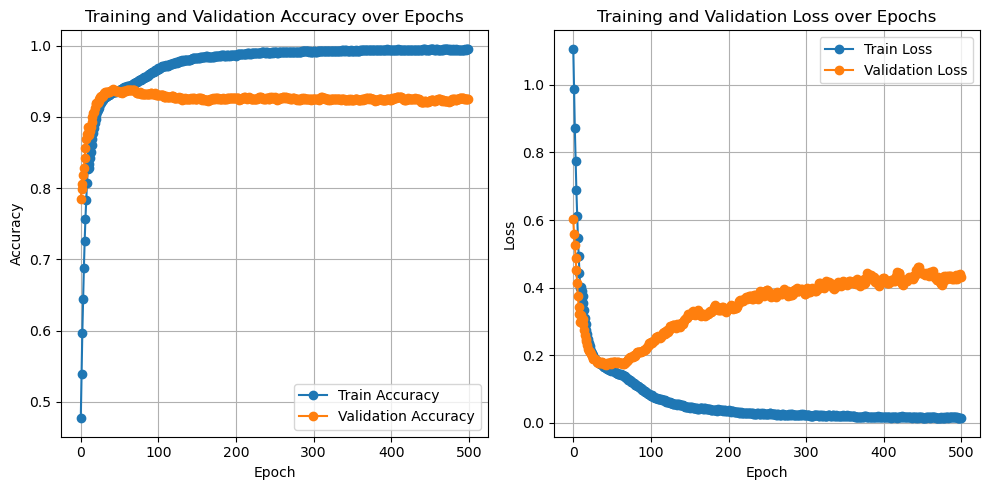

In [90]:
test_model_accuracy(model)

## Adding the Second Dropout Layer

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_23 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_5 (Dropout)         (None, 4, 29, 32)         0         
                                                                 
 conv2d_40 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_24 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_6 (Dropout)         (None, 1, 13, 64)       

In [92]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 16ms/step - loss: 1.3592 - accuracy: 0.3892 - val_loss: 0.9981 - val_accuracy: 0.5565
Epoch 2/50
175/175 [==============================] - 3s 18ms/step - loss: 0.7570 - accuracy: 0.6374 - val_loss: 0.4231 - val_accuracy: 0.8274
Epoch 3/50
175/175 [==============================] - 2s 12ms/step - loss: 0.4518 - accuracy: 0.8080 - val_loss: 0.4464 - val_accuracy: 0.8109
Epoch 4/50
175/175 [==============================] - 3s 15ms/step - loss: 0.3845 - accuracy: 0.8418 - val_loss: 0.3165 - val_accuracy: 0.8831
Epoch 5/50
175/175 [==============================] - 2s 12ms/step - loss: 0.3373 - accuracy: 0.8603 - val_loss: 0.2842 - val_accuracy: 0.8838
Epoch 6/50
175/175 [==============================] - 2s 13ms/step - loss: 0.3040 - accuracy: 0.8728 - val_loss: 0.2880 - val_accuracy: 0.8928
Epoch 7/50
175/175 [==============================] - 2s 13ms/step - loss: 0.2860 - accuracy: 0.8828 - val_loss: 0.2436 - val_accuracy: 0.9042

110/110 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9422
Test Accuracy: 94.2236%


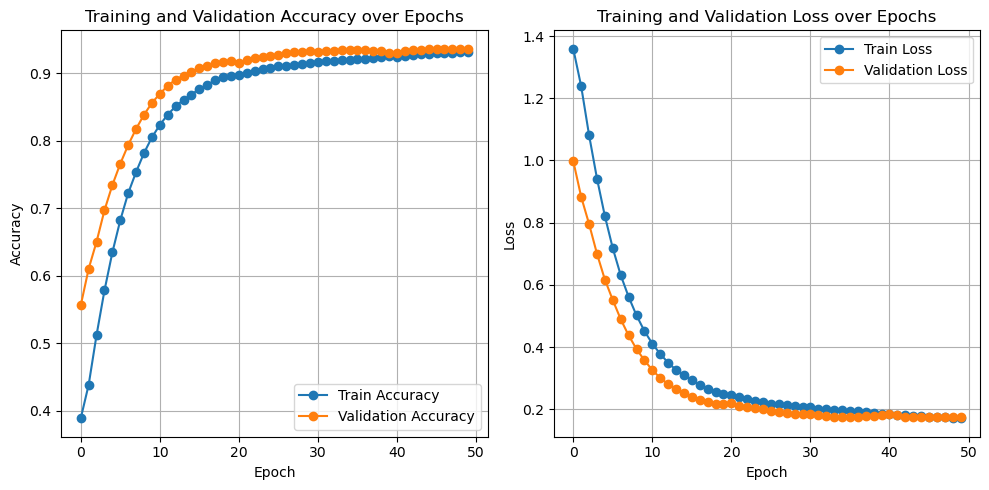

In [93]:
test_model_accuracy(model)

## Testing Two Dropout Layer Added Model with 100 Epoch

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_25 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_7 (Dropout)         (None, 4, 29, 32)         0         
                                                                 
 conv2d_42 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_26 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_8 (Dropout)         (None, 1, 13, 64)       

In [95]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2,batch_size=64)

Epoch 1/100
175/175 [==============================] - 4s 18ms/step - loss: 1.1825 - accuracy: 0.3676 - val_loss: 1.0915 - val_accuracy: 0.3788
Epoch 2/100
175/175 [==============================] - 2s 14ms/step - loss: 0.9648 - accuracy: 0.5009 - val_loss: 0.7217 - val_accuracy: 0.6605
Epoch 3/100
175/175 [==============================] - 2s 12ms/step - loss: 0.6007 - accuracy: 0.7251 - val_loss: 0.3875 - val_accuracy: 0.8306
Epoch 4/100
175/175 [==============================] - 2s 14ms/step - loss: 0.3989 - accuracy: 0.8320 - val_loss: 0.2940 - val_accuracy: 0.8849
Epoch 5/100
175/175 [==============================] - 2s 13ms/step - loss: 0.3424 - accuracy: 0.8562 - val_loss: 0.2788 - val_accuracy: 0.8939
Epoch 6/100
175/175 [==============================] - 3s 18ms/step - loss: 0.3088 - accuracy: 0.8694 - val_loss: 0.2869 - val_accuracy: 0.8892
Epoch 7/100
175/175 [==============================] - 2s 12ms/step - loss: 0.2982 - accuracy: 0.8758 - val_loss: 0.2763 - val_accuracy:

110/110 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9362
Test Accuracy: 93.6231%


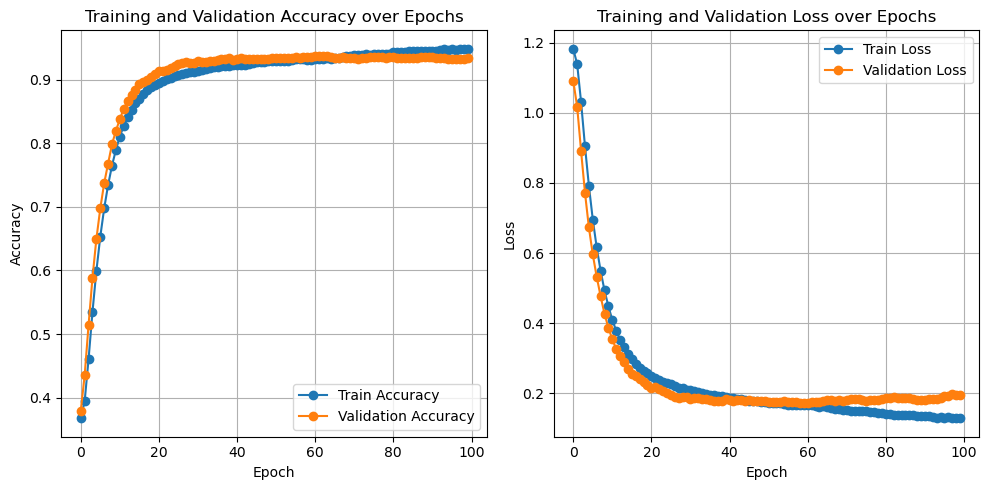

In [96]:
test_model_accuracy(model)

## Adding More Dropout Layers

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_33 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_16 (Dropout)        (None, 4, 29, 32)         0         
                                                                 
 conv2d_50 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_34 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_17 (Dropout)        (None, 1, 13, 64)       

In [108]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 16ms/step - loss: 1.1521 - accuracy: 0.3656 - val_loss: 1.0947 - val_accuracy: 0.3760
Epoch 2/50
175/175 [==============================] - 3s 15ms/step - loss: 0.9090 - accuracy: 0.5119 - val_loss: 0.5786 - val_accuracy: 0.7645
Epoch 3/50
175/175 [==============================] - 4s 21ms/step - loss: 0.4986 - accuracy: 0.7805 - val_loss: 0.3527 - val_accuracy: 0.8592
Epoch 4/50
175/175 [==============================] - 2s 14ms/step - loss: 0.3760 - accuracy: 0.8500 - val_loss: 0.2653 - val_accuracy: 0.9035
Epoch 5/50
175/175 [==============================] - 3s 15ms/step - loss: 0.3311 - accuracy: 0.8634 - val_loss: 0.2531 - val_accuracy: 0.9074
Epoch 6/50
175/175 [==============================] - 2s 13ms/step - loss: 0.3111 - accuracy: 0.8735 - val_loss: 0.2552 - val_accuracy: 0.9028
Epoch 7/50
175/175 [==============================] - 2s 14ms/step - loss: 0.2879 - accuracy: 0.8830 - val_loss: 0.2310 - val_accuracy: 0.9135

110/110 [==============================] - 0s 3ms/step - loss: 0.1446 - accuracy: 0.9425
Test Accuracy: 94.2522%


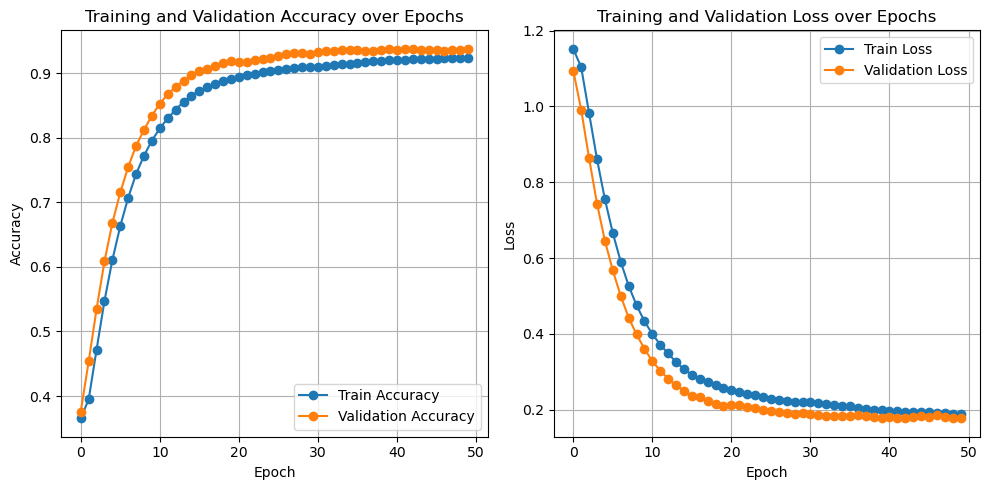

In [109]:
test_model_accuracy(model)

## Adding More Dropout after Dense Layers

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_35 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_19 (Dropout)        (None, 4, 29, 32)         0         
                                                                 
 conv2d_52 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_36 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_20 (Dropout)        (None, 1, 13, 64)       

In [111]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 3s 13ms/step - loss: 1.2826 - accuracy: 0.3634 - val_loss: 1.0877 - val_accuracy: 0.3760
Epoch 2/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0953 - accuracy: 0.3819 - val_loss: 1.0860 - val_accuracy: 0.3756
Epoch 3/50
175/175 [==============================] - 2s 11ms/step - loss: 1.0707 - accuracy: 0.4024 - val_loss: 0.8784 - val_accuracy: 0.5690
Epoch 4/50
175/175 [==============================] - 3s 15ms/step - loss: 0.8139 - accuracy: 0.5946 - val_loss: 0.4904 - val_accuracy: 0.8084
Epoch 5/50
175/175 [==============================] - 2s 14ms/step - loss: 0.5102 - accuracy: 0.7863 - val_loss: 0.3658 - val_accuracy: 0.8717
Epoch 6/50
175/175 [==============================] - 3s 16ms/step - loss: 0.4095 - accuracy: 0.8355 - val_loss: 0.3462 - val_accuracy: 0.8585
Epoch 7/50
175/175 [==============================] - 2s 12ms/step - loss: 0.3609 - accuracy: 0.8563 - val_loss: 0.2749 - val_accuracy: 0.9078

110/110 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9462
Test Accuracy: 94.6240%


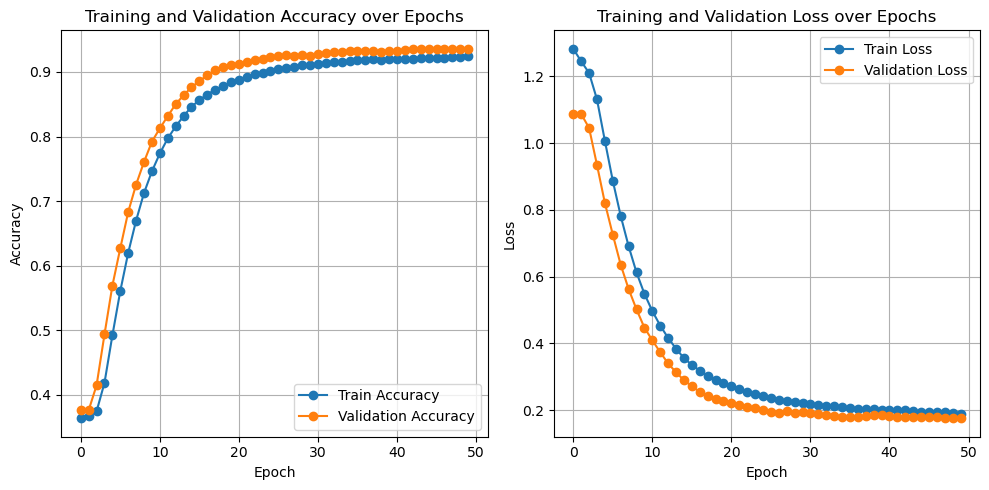

In [112]:
test_model_accuracy(model)

## Adding Dropout Layers after All Dense Layers

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_41 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_33 (Dropout)        (None, 4, 29, 32)         0         
                                                                 
 conv2d_58 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_42 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_34 (Dropout)        (None, 1, 13, 64)       

In [119]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 3s 16ms/step - loss: 1.2326 - accuracy: 0.3691 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 2/50
175/175 [==============================] - 2s 14ms/step - loss: 1.0933 - accuracy: 0.3807 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0931 - accuracy: 0.3824 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 4/50
175/175 [==============================] - 2s 13ms/step - loss: 1.0924 - accuracy: 0.3815 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 5/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0926 - accuracy: 0.3827 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 6/50
175/175 [==============================] - 2s 12ms/step - loss: 1.0922 - accuracy: 0.3819 - val_loss: 1.0943 - val_accuracy: 0.3760
Epoch 7/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0926 - accuracy: 0.3824 - val_loss: 1.0939 - val_accuracy: 0.3760

110/110 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9277
Test Accuracy: 92.7652%


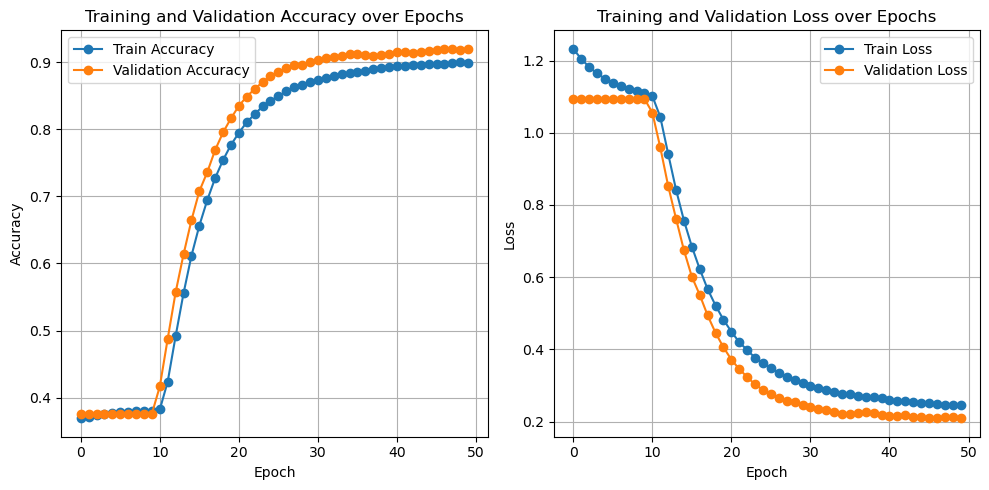

In [120]:
test_model_accuracy(model)

## Testing with 100 epochs

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_43 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_38 (Dropout)        (None, 4, 29, 32)         0         
                                                                 
 conv2d_60 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_44 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_39 (Dropout)        (None, 1, 13, 64)       

In [122]:
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2,batch_size=64)

Epoch 1/100
175/175 [==============================] - 4s 19ms/step - loss: 1.2399 - accuracy: 0.3592 - val_loss: 1.0947 - val_accuracy: 0.3760
Epoch 2/100
175/175 [==============================] - 2s 12ms/step - loss: 1.0936 - accuracy: 0.3803 - val_loss: 1.0922 - val_accuracy: 0.3760
Epoch 3/100
175/175 [==============================] - 4s 20ms/step - loss: 1.0933 - accuracy: 0.3810 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 4/100
175/175 [==============================] - 2s 13ms/step - loss: 1.0898 - accuracy: 0.3865 - val_loss: 1.0888 - val_accuracy: 0.3749
Epoch 5/100
175/175 [==============================] - 2s 13ms/step - loss: 0.8284 - accuracy: 0.5945 - val_loss: 0.5840 - val_accuracy: 0.7752
Epoch 6/100
175/175 [==============================] - 2s 14ms/step - loss: 0.5426 - accuracy: 0.7743 - val_loss: 0.4307 - val_accuracy: 0.8063
Epoch 7/100
175/175 [==============================] - 3s 15ms/step - loss: 0.4522 - accuracy: 0.8154 - val_loss: 0.4560 - val_accuracy:

110/110 [==============================] - 0s 2ms/step - loss: 0.1422 - accuracy: 0.9414
Test Accuracy: 94.1378%


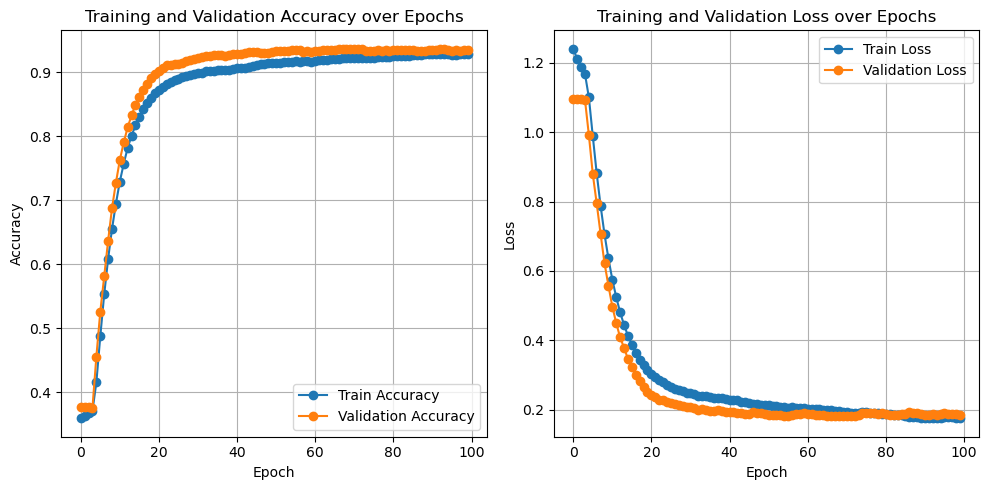

In [123]:
test_model_accuracy(model)

## Adding one more dense layer 

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_45 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_43 (Dropout)        (None, 4, 29, 32)         0         
                                                                 
 conv2d_62 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_46 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_44 (Dropout)        (None, 1, 13, 64)       

In [125]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 15ms/step - loss: 1.1909 - accuracy: 0.3644 - val_loss: 1.0982 - val_accuracy: 0.3760
Epoch 2/50
175/175 [==============================] - 2s 14ms/step - loss: 1.0952 - accuracy: 0.3774 - val_loss: 1.0929 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 2s 13ms/step - loss: 1.0925 - accuracy: 0.3826 - val_loss: 1.0945 - val_accuracy: 0.3760
Epoch 4/50
175/175 [==============================] - 2s 13ms/step - loss: 1.0914 - accuracy: 0.3816 - val_loss: 1.0838 - val_accuracy: 0.3760
Epoch 5/50
175/175 [==============================] - 3s 14ms/step - loss: 1.0345 - accuracy: 0.4451 - val_loss: 0.8041 - val_accuracy: 0.6440
Epoch 6/50
175/175 [==============================] - 2s 13ms/step - loss: 0.7869 - accuracy: 0.6093 - val_loss: 0.6416 - val_accuracy: 0.6726
Epoch 7/50
175/175 [==============================] - 3s 17ms/step - loss: 0.5874 - accuracy: 0.7120 - val_loss: 0.3735 - val_accuracy: 0.8542

110/110 [==============================] - 1s 2ms/step - loss: 0.2119 - accuracy: 0.9188
Test Accuracy: 91.8788%


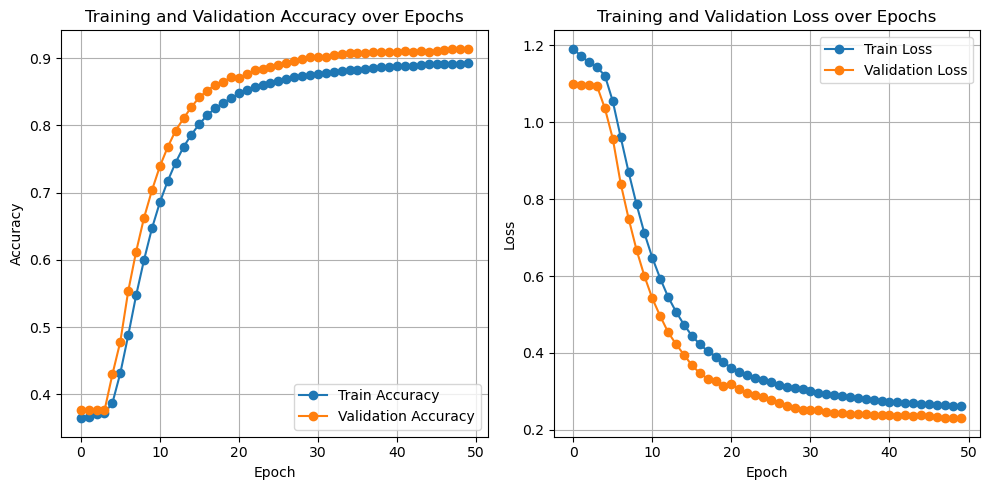

In [126]:
test_model_accuracy(model)

## Implementing Early Stopping

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_47 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_48 (Dropout)        (None, 4, 29, 32)         0         
                                                                 
 conv2d_64 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_48 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_49 (Dropout)        (None, 1, 13, 64)       

In [128]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  #Monitor validation loss
    patience=5,          #Number of epochs with no improvement after which training will be stopped
    min_delta=0.01,      #Minimum change to qualify as an improvement
    mode='min',          #The training will stop when the quantity monitored stops decreasing
    verbose=1            #Print messages when early stopping is triggered
)

history = model.fit(x_train, y_train, epochs=100, validation_split=0.2,batch_size=64, callbacks=[early_stopping])



Epoch 1/100
175/175 [==============================] - 4s 18ms/step - loss: 1.2222 - accuracy: 0.3602 - val_loss: 1.0931 - val_accuracy: 0.4364
Epoch 2/100
175/175 [==============================] - 3s 14ms/step - loss: 1.0947 - accuracy: 0.3808 - val_loss: 1.0943 - val_accuracy: 0.3760
Epoch 3/100
175/175 [==============================] - 3s 15ms/step - loss: 1.0930 - accuracy: 0.3808 - val_loss: 1.0892 - val_accuracy: 0.3760
Epoch 4/100
175/175 [==============================] - 2s 12ms/step - loss: 1.0911 - accuracy: 0.3813 - val_loss: 1.0906 - val_accuracy: 0.3760
Epoch 5/100
175/175 [==============================] - 3s 16ms/step - loss: 1.0782 - accuracy: 0.3842 - val_loss: 0.9532 - val_accuracy: 0.4321
Epoch 6/100
175/175 [==============================] - 2s 13ms/step - loss: 0.8826 - accuracy: 0.5331 - val_loss: 0.7681 - val_accuracy: 0.6465
Epoch 7/100
175/175 [==============================] - 3s 16ms/step - loss: 0.6552 - accuracy: 0.6889 - val_loss: 0.4422 - val_accuracy:

110/110 [==============================] - 0s 3ms/step - loss: 0.1860 - accuracy: 0.9299
Test Accuracy: 92.9940%


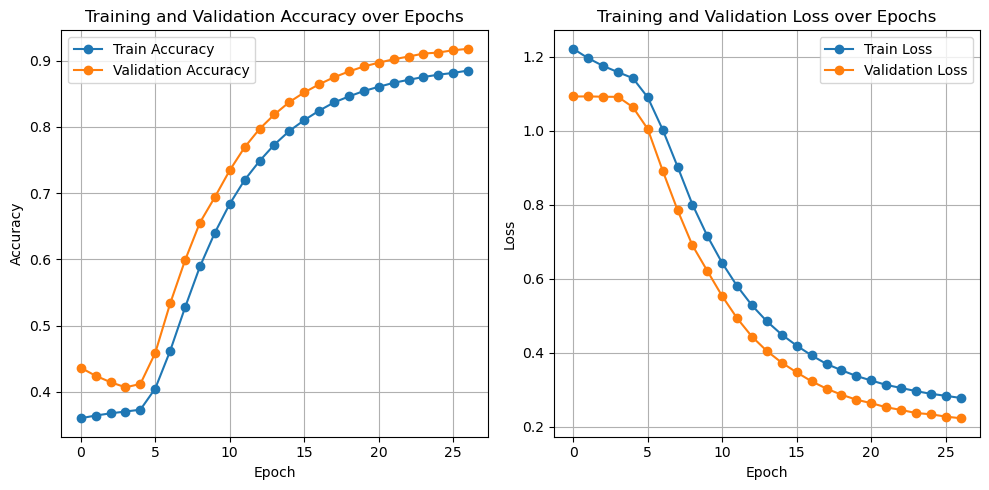

In [129]:
test_model_accuracy(model)

## Changing Learning Rate and Optimizers

### Using SGD optimizer with 0.0007 learning rate

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

optimizer = SGD(learning_rate=0.0007, momentum=0.5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_75 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_104 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_92 (Conv2D)          (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_76 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_105 (Dropout)       (None, 1, 13, 64)       

In [166]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 21ms/step - loss: 1.3315 - accuracy: 0.3451 - val_loss: 1.0891 - val_accuracy: 0.3888
Epoch 2/50
175/175 [==============================] - 2s 14ms/step - loss: 1.0971 - accuracy: 0.3683 - val_loss: 1.0816 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 4s 20ms/step - loss: 1.0810 - accuracy: 0.3966 - val_loss: 1.0551 - val_accuracy: 0.5336
Epoch 4/50
175/175 [==============================] - 4s 22ms/step - loss: 1.0681 - accuracy: 0.4205 - val_loss: 1.0225 - val_accuracy: 0.6144
Epoch 5/50
175/175 [==============================] - 3s 14ms/step - loss: 1.0528 - accuracy: 0.4323 - val_loss: 0.9948 - val_accuracy: 0.6562
Epoch 6/50
175/175 [==============================] - 3s 19ms/step - loss: 1.0226 - accuracy: 0.4585 - val_loss: 0.9687 - val_accuracy: 0.5768
Epoch 7/50
175/175 [==============================] - 4s 23ms/step - loss: 0.9811 - accuracy: 0.4997 - val_loss: 0.9340 - val_accuracy: 0.5622

110/110 [==============================] - 0s 4ms/step - loss: 0.2663 - accuracy: 0.8999
Test Accuracy: 89.9914%


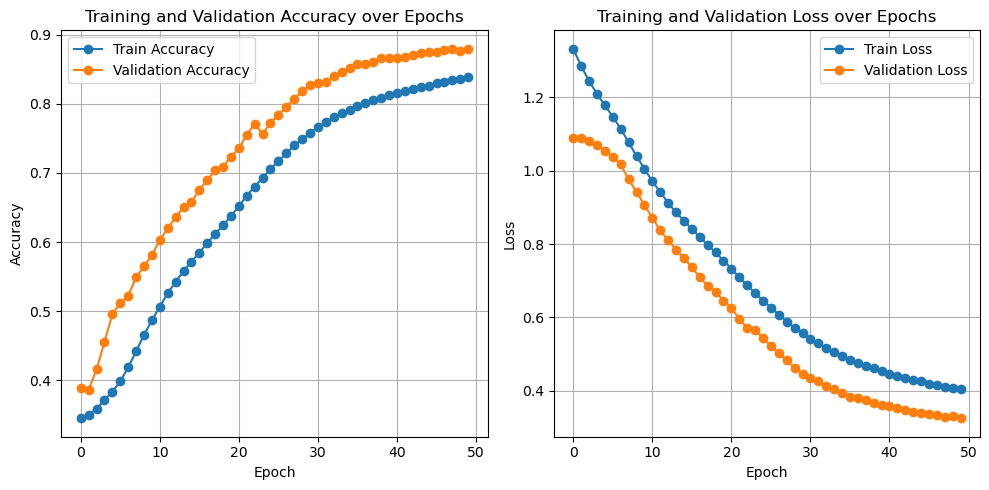

In [167]:
test_model_accuracy(model)

## Adding More Complexity

In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D, Activation, AveragePooling2D

model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3,3), padding='same', input_shape=(11,61,1)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Second Convolutional Layer
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Flattening the output to feed the dense layer
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    
    # Output Layer with softmax activation for multi-class classification
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_113 (Conv2D)         (None, 11, 61, 32)        320       
                                                                 
 batch_normalization_22 (Bat  (None, 11, 61, 32)       128       
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 11, 61, 32)        0         
                                                                 
 conv2d_114 (Conv2D)         (None, 11, 61, 32)        9248      
                                                                 
 batch_normalization_23 (Bat  (None, 11, 61, 32)       128       
 chNormalization)                                                
                                                                 
 activation_23 (Activation)  (None, 11, 61, 32)      

In [175]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 12s 62ms/step - loss: 0.4727 - accuracy: 0.8114 - val_loss: 0.8320 - val_accuracy: 0.5883
Epoch 2/50
175/175 [==============================] - 13s 73ms/step - loss: 0.2452 - accuracy: 0.9100 - val_loss: 1.0342 - val_accuracy: 0.5736
Epoch 3/50
175/175 [==============================] - 12s 66ms/step - loss: 0.2003 - accuracy: 0.9301 - val_loss: 9.6634 - val_accuracy: 0.3760
Epoch 4/50
175/175 [==============================] - 10s 58ms/step - loss: 0.1717 - accuracy: 0.9391 - val_loss: 0.1858 - val_accuracy: 0.9350
Epoch 5/50
175/175 [==============================] - 11s 61ms/step - loss: 0.1630 - accuracy: 0.9427 - val_loss: 0.3330 - val_accuracy: 0.8831
Epoch 6/50
175/175 [==============================] - 11s 62ms/step - loss: 0.1476 - accuracy: 0.9466 - val_loss: 0.2641 - val_accuracy: 0.9042
Epoch 7/50
175/175 [==============================] - 11s 65ms/step - loss: 0.1337 - accuracy: 0.9524 - val_loss: 2.2198 - val_accuracy:

110/110 [==============================] - 2s 14ms/step - loss: 0.4594 - accuracy: 0.8662
Test Accuracy: 86.6171%


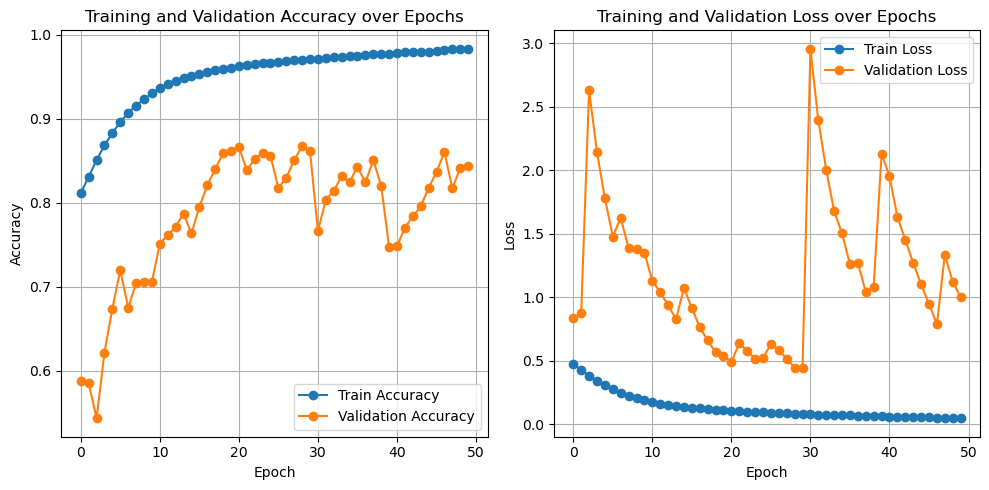

In [176]:
test_model_accuracy(model)

## Little Bit Reduced Complexity

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D, Activation, AveragePooling2D

model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3,3), padding='same', input_shape=(11,61,1)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Second Convolutional Layer
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    
    Dropout(0.25),
    
    # Flattening the output to feed the dense layer
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dropout(0.25),
    
    # Output Layer with softmax activation for multi-class classification
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117 (Conv2D)         (None, 11, 61, 32)        320       
                                                                 
 batch_normalization_26 (Bat  (None, 11, 61, 32)       128       
 chNormalization)                                                
                                                                 
 activation_26 (Activation)  (None, 11, 61, 32)        0         
                                                                 
 conv2d_118 (Conv2D)         (None, 11, 61, 32)        9248      
                                                                 
 batch_normalization_27 (Bat  (None, 11, 61, 32)       128       
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 11, 61, 32)      

In [178]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 12s 65ms/step - loss: 0.4980 - accuracy: 0.7971 - val_loss: 0.8436 - val_accuracy: 0.4360
Epoch 2/50
175/175 [==============================] - 12s 70ms/step - loss: 0.2796 - accuracy: 0.9013 - val_loss: 0.5353 - val_accuracy: 0.7555
Epoch 3/50
175/175 [==============================] - 10s 58ms/step - loss: 0.2393 - accuracy: 0.9126 - val_loss: 0.3163 - val_accuracy: 0.8996
Epoch 4/50
175/175 [==============================] - 10s 57ms/step - loss: 0.1982 - accuracy: 0.9284 - val_loss: 0.5373 - val_accuracy: 0.8074
Epoch 5/50
175/175 [==============================] - 10s 60ms/step - loss: 0.1859 - accuracy: 0.9340 - val_loss: 0.5325 - val_accuracy: 0.7963
Epoch 6/50
175/175 [==============================] - 10s 57ms/step - loss: 0.1718 - accuracy: 0.9390 - val_loss: 0.3097 - val_accuracy: 0.8392
Epoch 7/50
175/175 [==============================] - 11s 62ms/step - loss: 0.1633 - accuracy: 0.9413 - val_loss: 1.4627 - val_accuracy:

110/110 [==============================] - 3s 24ms/step - loss: 0.2505 - accuracy: 0.9299
Test Accuracy: 92.9940%


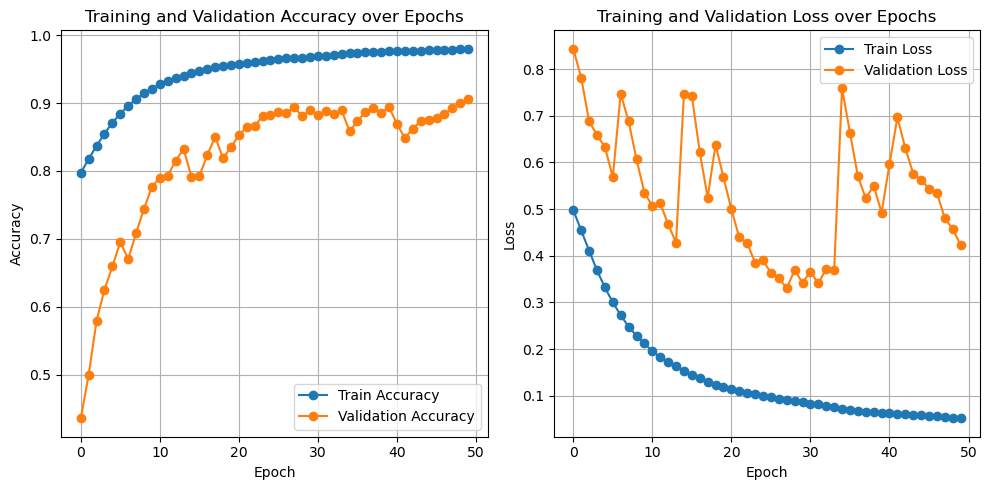

In [179]:
test_model_accuracy(model)

## After all the tests base model selected for optimizing the learning rate

### Default Adam Learning Rate 0.001

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_122 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_92 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_146 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_123 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_93 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_147 (Dropout)       (None, 1, 13, 64)       

In [184]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 6s 23ms/step - loss: 1.2151 - accuracy: 0.3710 - val_loss: 1.0912 - val_accuracy: 0.3785
Epoch 2/50
175/175 [==============================] - 6s 35ms/step - loss: 1.0783 - accuracy: 0.3875 - val_loss: 0.8817 - val_accuracy: 0.6630
Epoch 3/50
175/175 [==============================] - 6s 36ms/step - loss: 0.6983 - accuracy: 0.6598 - val_loss: 0.4200 - val_accuracy: 0.8377
Epoch 4/50
175/175 [==============================] - 5s 30ms/step - loss: 0.4511 - accuracy: 0.8123 - val_loss: 0.3597 - val_accuracy: 0.8670
Epoch 5/50
175/175 [==============================] - 6s 36ms/step - loss: 0.3779 - accuracy: 0.8458 - val_loss: 0.3022 - val_accuracy: 0.8924
Epoch 6/50
175/175 [==============================] - 6s 35ms/step - loss: 0.3351 - accuracy: 0.8659 - val_loss: 0.2623 - val_accuracy: 0.9024
Epoch 7/50
175/175 [==============================] - 4s 26ms/step - loss: 0.3263 - accuracy: 0.8676 - val_loss: 0.2526 - val_accuracy: 0.9071

110/110 [==============================] - 1s 4ms/step - loss: 0.1478 - accuracy: 0.9434
Test Accuracy: 94.3380%


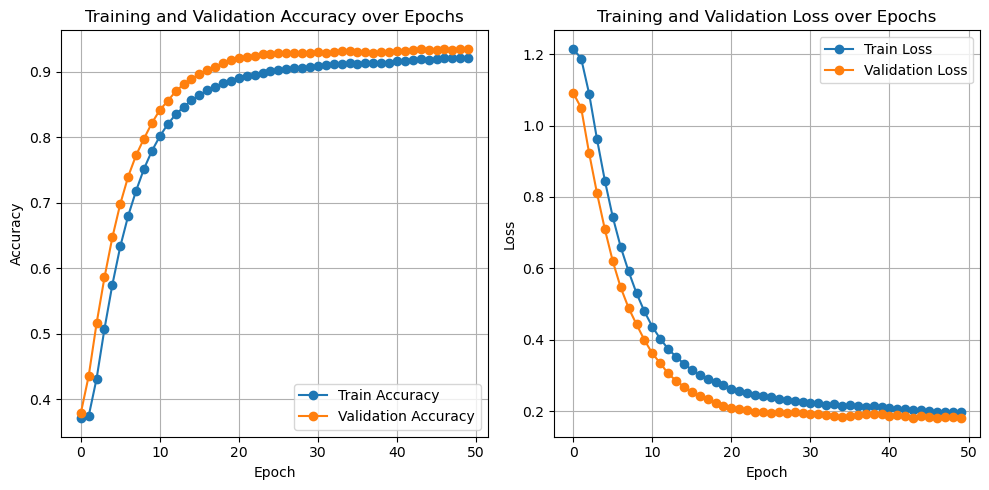

In [185]:
test_model_accuracy(model)

### Changing Adam Learning Rate 0.002

In [191]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.002)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_98 (Avera  (None, 4, 29, 32)        0         
 gePooling2D)                                                    
                                                                 
 dropout_160 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_129 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_99 (Avera  (None, 1, 13, 64)        0         
 gePooling2D)                                                    
                                                                 
 dropout_161 (Dropout)       (None, 1, 13, 64)       

In [192]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 6s 20ms/step - loss: 1.3003 - accuracy: 0.3710 - val_loss: 1.0942 - val_accuracy: 0.3760
Epoch 2/50
175/175 [==============================] - 4s 21ms/step - loss: 1.0928 - accuracy: 0.3793 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 3s 20ms/step - loss: 1.0927 - accuracy: 0.3822 - val_loss: 1.0950 - val_accuracy: 0.3760
Epoch 4/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0925 - accuracy: 0.3819 - val_loss: 1.0942 - val_accuracy: 0.3760
Epoch 5/50
175/175 [==============================] - 3s 17ms/step - loss: 1.0906 - accuracy: 0.3824 - val_loss: 1.0963 - val_accuracy: 0.3760
Epoch 6/50
175/175 [==============================] - 4s 22ms/step - loss: 1.0924 - accuracy: 0.3840 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 7/50
175/175 [==============================] - 3s 16ms/step - loss: 1.0710 - accuracy: 0.3909 - val_loss: 0.8580 - val_accuracy: 0.5479

110/110 [==============================] - 0s 3ms/step - loss: 0.2342 - accuracy: 0.9071
Test Accuracy: 90.7063%


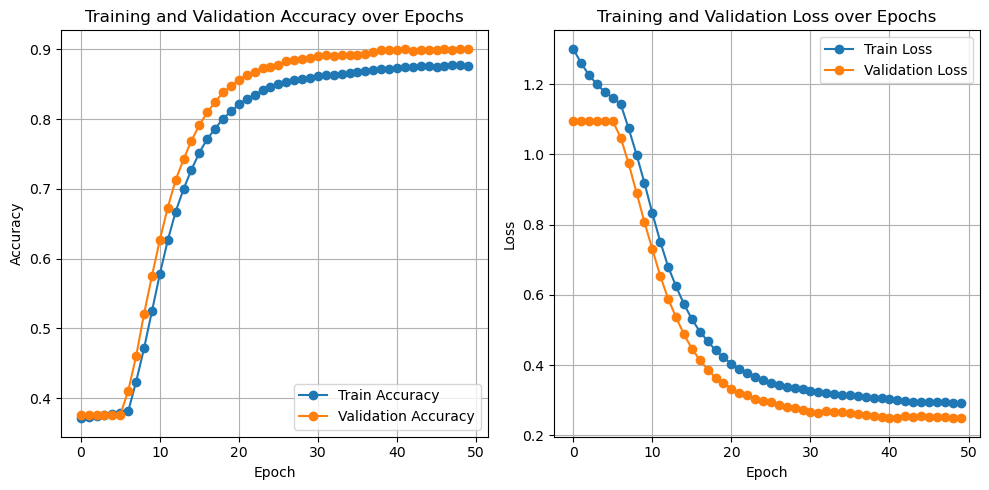

In [193]:
test_model_accuracy(model)

### Changing Adam Learning Rate 0.0005

In [195]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_102 (Aver  (None, 4, 29, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_168 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_133 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_103 (Aver  (None, 1, 13, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_169 (Dropout)       (None, 1, 13, 64)       

In [196]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 5s 23ms/step - loss: 1.3887 - accuracy: 0.3551 - val_loss: 1.0951 - val_accuracy: 0.3442
Epoch 2/50
175/175 [==============================] - 4s 20ms/step - loss: 1.0941 - accuracy: 0.3863 - val_loss: 1.0781 - val_accuracy: 0.3753
Epoch 3/50
175/175 [==============================] - 2s 13ms/step - loss: 1.0393 - accuracy: 0.4339 - val_loss: 0.8343 - val_accuracy: 0.5911
Epoch 4/50
175/175 [==============================] - 3s 18ms/step - loss: 0.7507 - accuracy: 0.6242 - val_loss: 0.4772 - val_accuracy: 0.8013
Epoch 5/50
175/175 [==============================] - 3s 15ms/step - loss: 0.5180 - accuracy: 0.7764 - val_loss: 0.3960 - val_accuracy: 0.8370
Epoch 6/50
175/175 [==============================] - 3s 15ms/step - loss: 0.4431 - accuracy: 0.8151 - val_loss: 0.3567 - val_accuracy: 0.8535
Epoch 7/50
175/175 [==============================] - 2s 14ms/step - loss: 0.3920 - accuracy: 0.8414 - val_loss: 0.3223 - val_accuracy: 0.8749

110/110 [==============================] - 0s 2ms/step - loss: 0.1359 - accuracy: 0.9440
Test Accuracy: 94.3952%


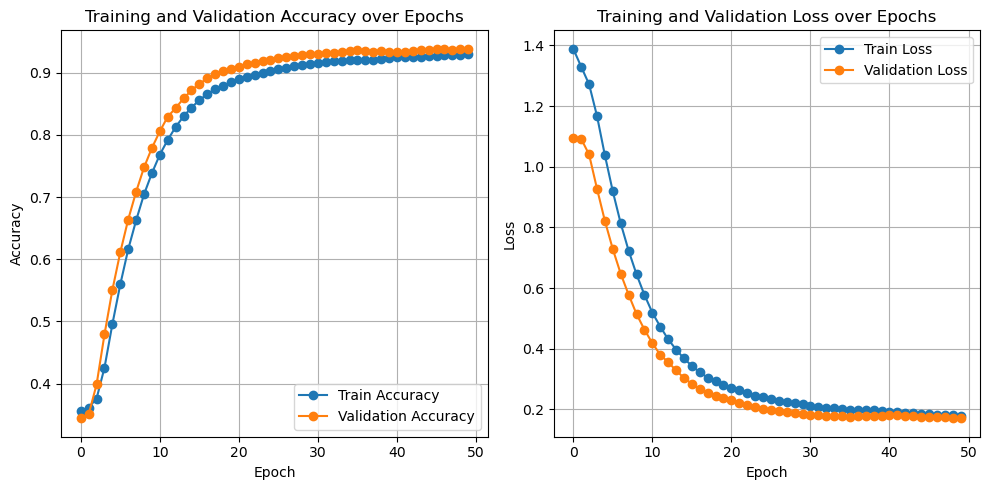

In [197]:
test_model_accuracy(model)

### Changing Adam Learning Rate 0.0001

In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_134 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_104 (Aver  (None, 4, 29, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_172 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_135 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_105 (Aver  (None, 1, 13, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_173 (Dropout)       (None, 1, 13, 64)       

In [200]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 7s 17ms/step - loss: 1.6776 - accuracy: 0.3475 - val_loss: 1.0968 - val_accuracy: 0.3277
Epoch 2/50
175/175 [==============================] - 2s 13ms/step - loss: 1.1360 - accuracy: 0.3450 - val_loss: 1.0980 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 3s 17ms/step - loss: 1.1077 - accuracy: 0.3631 - val_loss: 1.0968 - val_accuracy: 0.3760
Epoch 4/50
175/175 [==============================] - 2s 12ms/step - loss: 1.1002 - accuracy: 0.3733 - val_loss: 1.0957 - val_accuracy: 0.3760
Epoch 5/50
175/175 [==============================] - 3s 18ms/step - loss: 1.0980 - accuracy: 0.3769 - val_loss: 1.0950 - val_accuracy: 0.3760
Epoch 6/50
175/175 [==============================] - 3s 16ms/step - loss: 1.0974 - accuracy: 0.3789 - val_loss: 1.0945 - val_accuracy: 0.3760
Epoch 7/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0948 - accuracy: 0.3779 - val_loss: 1.0942 - val_accuracy: 0.3760

110/110 [==============================] - 0s 3ms/step - loss: 1.0902 - accuracy: 0.3909
Test Accuracy: 39.0906%


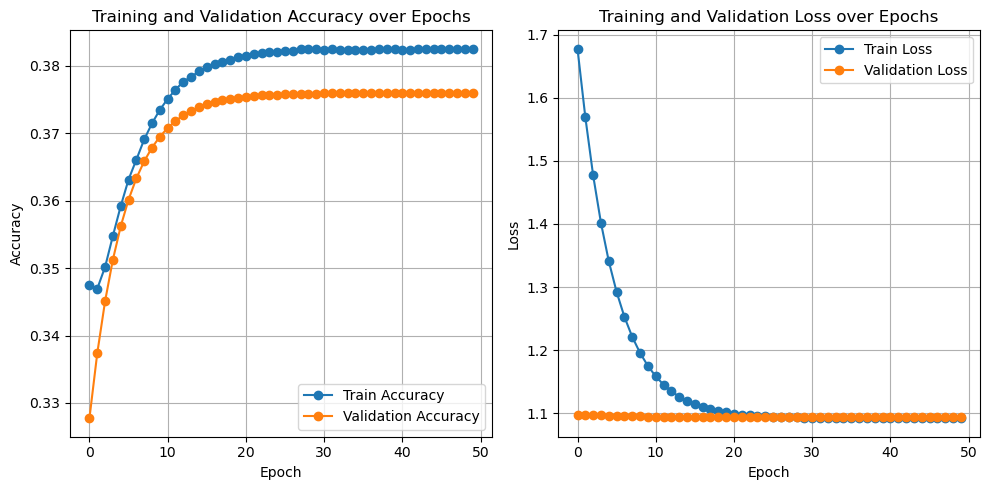

In [201]:
test_model_accuracy(model)

### Changing Adam Learning Rate 0.00075

In [202]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.00075)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_136 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_106 (Aver  (None, 4, 29, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_176 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_137 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_107 (Aver  (None, 1, 13, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_177 (Dropout)       (None, 1, 13, 64)       

In [203]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 18ms/step - loss: 1.2451 - accuracy: 0.3551 - val_loss: 1.0957 - val_accuracy: 0.3753
Epoch 2/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0971 - accuracy: 0.3690 - val_loss: 1.0945 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 3s 18ms/step - loss: 1.0882 - accuracy: 0.3836 - val_loss: 1.0064 - val_accuracy: 0.3763
Epoch 4/50
175/175 [==============================] - 2s 14ms/step - loss: 0.8179 - accuracy: 0.5828 - val_loss: 0.5158 - val_accuracy: 0.7720
Epoch 5/50
175/175 [==============================] - 3s 15ms/step - loss: 0.4956 - accuracy: 0.7875 - val_loss: 0.3967 - val_accuracy: 0.8388
Epoch 6/50
175/175 [==============================] - 2s 14ms/step - loss: 0.4042 - accuracy: 0.8375 - val_loss: 0.3142 - val_accuracy: 0.8792
Epoch 7/50
175/175 [==============================] - 2s 14ms/step - loss: 0.3562 - accuracy: 0.8609 - val_loss: 0.2805 - val_accuracy: 0.8928

110/110 [==============================] - 0s 3ms/step - loss: 0.1474 - accuracy: 0.9442
Test Accuracy: 94.4238%


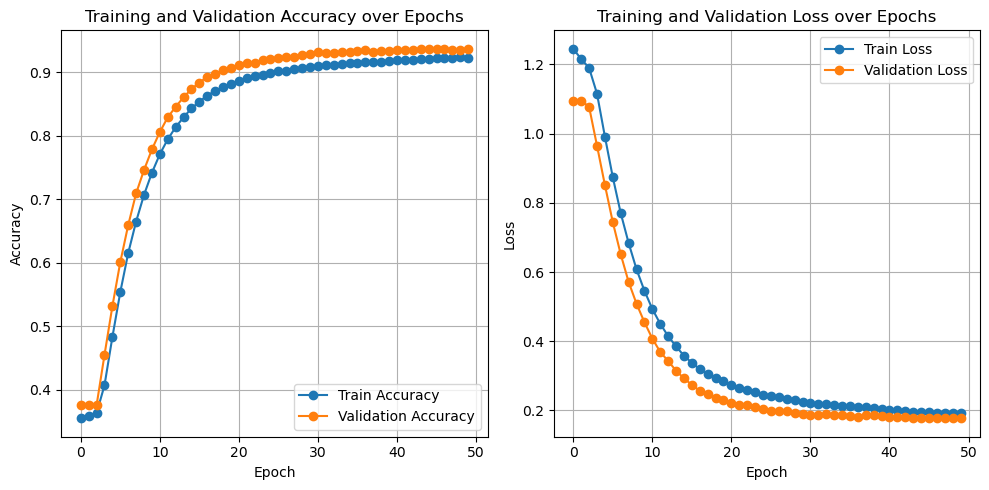

In [204]:
test_model_accuracy(model)

### Changing Adam Learning Rate 0.000865

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.000865)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_138 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_108 (Aver  (None, 4, 29, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_180 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_139 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_109 (Aver  (None, 1, 13, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_181 (Dropout)       (None, 1, 13, 64)       

In [207]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 19ms/step - loss: 1.2633 - accuracy: 0.3546 - val_loss: 1.0921 - val_accuracy: 0.3567
Epoch 2/50
175/175 [==============================] - 3s 17ms/step - loss: 1.0914 - accuracy: 0.3770 - val_loss: 1.0542 - val_accuracy: 0.3899
Epoch 3/50
175/175 [==============================] - 3s 20ms/step - loss: 0.9031 - accuracy: 0.5298 - val_loss: 0.5977 - val_accuracy: 0.7266
Epoch 4/50
175/175 [==============================] - 3s 15ms/step - loss: 0.5465 - accuracy: 0.7588 - val_loss: 0.3582 - val_accuracy: 0.8606
Epoch 5/50
175/175 [==============================] - 3s 18ms/step - loss: 0.4105 - accuracy: 0.8293 - val_loss: 0.3101 - val_accuracy: 0.8835
Epoch 6/50
175/175 [==============================] - 3s 17ms/step - loss: 0.3776 - accuracy: 0.8458 - val_loss: 0.2885 - val_accuracy: 0.8931
Epoch 7/50
175/175 [==============================] - 3s 18ms/step - loss: 0.3562 - accuracy: 0.8549 - val_loss: 0.2844 - val_accuracy: 0.8863

110/110 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9448
Test Accuracy: 94.4810%


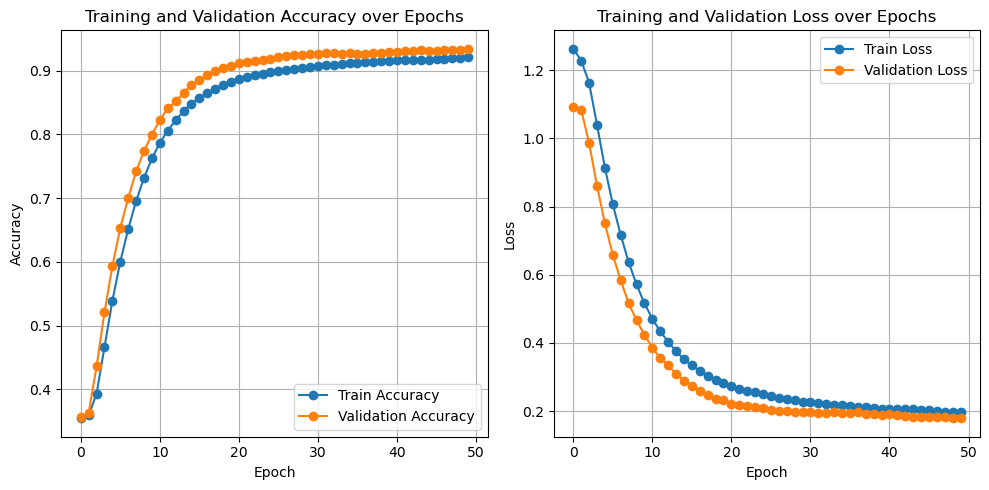

In [208]:
test_model_accuracy(model)

### Next Step (with the tests learning rate set as default rate = 0.001) changing epsilon

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.001,epsilon=2e-07)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_110 (Aver  (None, 4, 29, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_184 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_141 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_111 (Aver  (None, 1, 13, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_185 (Dropout)       (None, 1, 13, 64)       

In [210]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 19ms/step - loss: 1.4207 - accuracy: 0.3560 - val_loss: 1.0944 - val_accuracy: 0.3756
Epoch 2/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0960 - accuracy: 0.3760 - val_loss: 1.0912 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 3s 17ms/step - loss: 1.0942 - accuracy: 0.3813 - val_loss: 1.0943 - val_accuracy: 0.3760
Epoch 4/50
175/175 [==============================] - 3s 14ms/step - loss: 1.0927 - accuracy: 0.3815 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 5/50
175/175 [==============================] - 3s 20ms/step - loss: 1.0928 - accuracy: 0.3816 - val_loss: 1.0942 - val_accuracy: 0.3760
Epoch 6/50
175/175 [==============================] - 3s 16ms/step - loss: 1.0924 - accuracy: 0.3818 - val_loss: 1.0941 - val_accuracy: 0.3760
Epoch 7/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0928 - accuracy: 0.3818 - val_loss: 1.0943 - val_accuracy: 0.3760

110/110 [==============================] - 0s 3ms/step - loss: 1.0900 - accuracy: 0.3909
Test Accuracy: 39.0906%


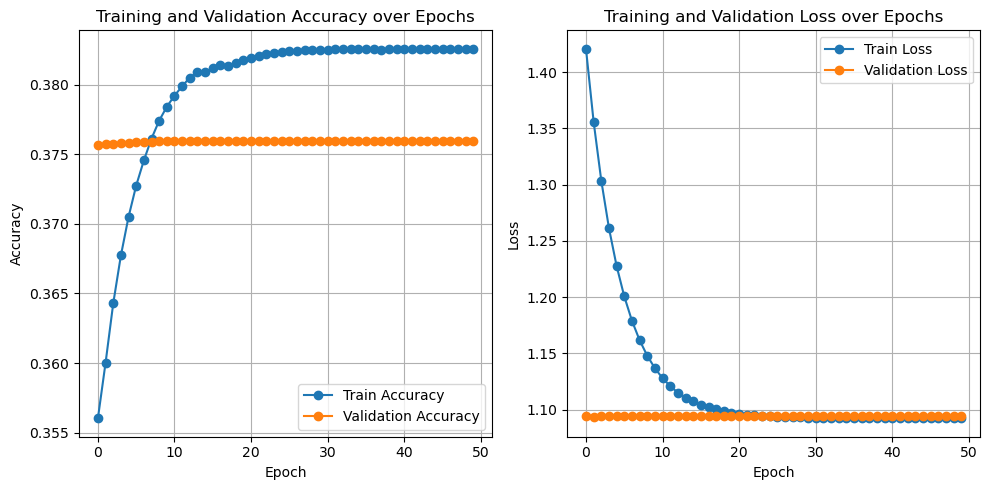

In [211]:
test_model_accuracy(model)

## Changing epsilon to 1.1 x e-7

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.001,epsilon=1.1e-07)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_142 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_112 (Aver  (None, 4, 29, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_188 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_143 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_113 (Aver  (None, 1, 13, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_189 (Dropout)       (None, 1, 13, 64)       

In [213]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 7s 20ms/step - loss: 1.1932 - accuracy: 0.3563 - val_loss: 1.0952 - val_accuracy: 0.3760
Epoch 2/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0942 - accuracy: 0.3743 - val_loss: 1.0946 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 3s 16ms/step - loss: 1.0916 - accuracy: 0.3856 - val_loss: 1.0694 - val_accuracy: 0.3760
Epoch 4/50
175/175 [==============================] - 3s 16ms/step - loss: 0.8733 - accuracy: 0.5517 - val_loss: 0.6076 - val_accuracy: 0.7691
Epoch 5/50
175/175 [==============================] - 3s 15ms/step - loss: 0.5220 - accuracy: 0.7730 - val_loss: 0.3787 - val_accuracy: 0.8485
Epoch 6/50
175/175 [==============================] - 3s 17ms/step - loss: 0.4130 - accuracy: 0.8339 - val_loss: 0.3781 - val_accuracy: 0.8377
Epoch 7/50
175/175 [==============================] - 2s 13ms/step - loss: 0.3716 - accuracy: 0.8479 - val_loss: 0.2674 - val_accuracy: 0.8996

110/110 [==============================] - 1s 4ms/step - loss: 0.1667 - accuracy: 0.9359
Test Accuracy: 93.5945%


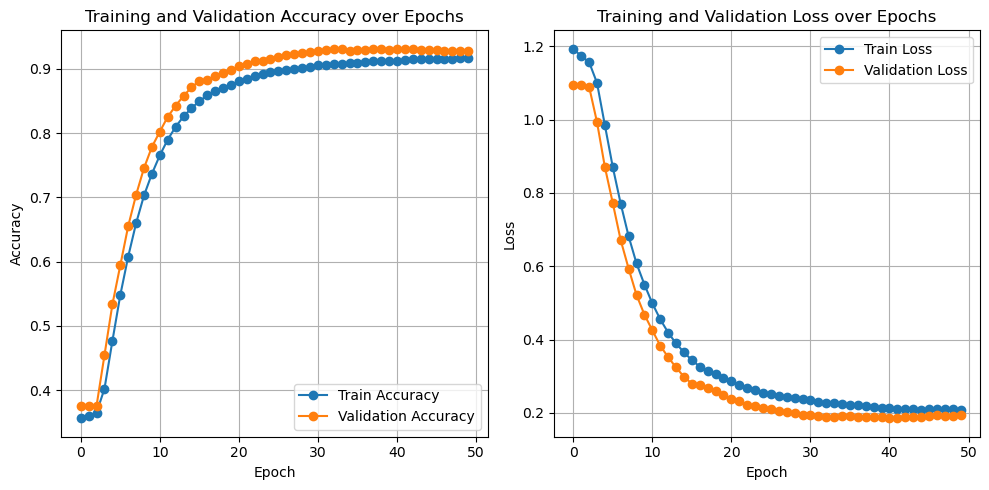

In [214]:
test_model_accuracy(model)

## Changing epsilon to 0.8 x e-7

In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.001,epsilon=0.8e-07)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_144 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_114 (Aver  (None, 4, 29, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_192 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_145 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_115 (Aver  (None, 1, 13, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_193 (Dropout)       (None, 1, 13, 64)       

In [217]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 18ms/step - loss: 1.2559 - accuracy: 0.3703 - val_loss: 1.0939 - val_accuracy: 0.3760
Epoch 2/50
175/175 [==============================] - 3s 16ms/step - loss: 1.0932 - accuracy: 0.3811 - val_loss: 1.0939 - val_accuracy: 0.3760
Epoch 3/50
175/175 [==============================] - 2s 12ms/step - loss: 1.0930 - accuracy: 0.3823 - val_loss: 1.0966 - val_accuracy: 0.3760
Epoch 4/50
175/175 [==============================] - 3s 15ms/step - loss: 1.0924 - accuracy: 0.3823 - val_loss: 1.0942 - val_accuracy: 0.3760
Epoch 5/50
175/175 [==============================] - 2s 12ms/step - loss: 1.0925 - accuracy: 0.3826 - val_loss: 1.0940 - val_accuracy: 0.3760
Epoch 6/50
175/175 [==============================] - 3s 19ms/step - loss: 1.0926 - accuracy: 0.3824 - val_loss: 1.0950 - val_accuracy: 0.3760
Epoch 7/50
175/175 [==============================] - 3s 19ms/step - loss: 1.0931 - accuracy: 0.3819 - val_loss: 1.0941 - val_accuracy: 0.3760

110/110 [==============================] - 0s 4ms/step - loss: 1.0900 - accuracy: 0.3909
Test Accuracy: 39.0906%


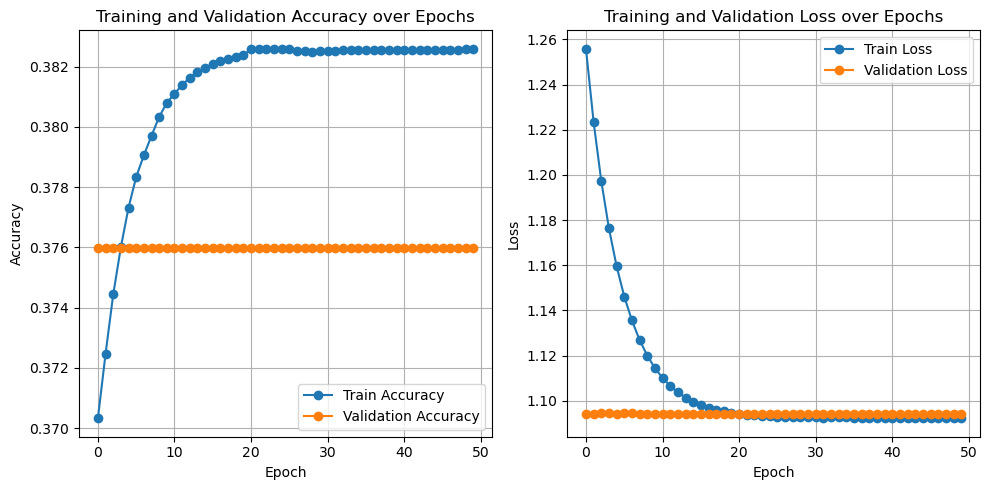

In [218]:
test_model_accuracy(model)

## Changing epsilon to 0.9 x e-7

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, MaxPooling2D,Activation,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
## Model Building

#Starting with a model
model = Sequential([
        #Single Convolutional Layer
        Conv2D(32, (3,3), activation = 'relu', input_shape = (11,61,1)),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

         #Second Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu',),

        #Added Pooling Layer
        AveragePooling2D(pool_size=(2, 2)),

        Dropout(0.25),  # Dropout layer after pooling

        #Flattening the output to feed the dense layer
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer

        
        Dense(64, activation = 'relu'),
        Dropout(0.25),  # Dropout layer after dense layer
        
        Dense(64, activation = 'relu'),
        

        #Output Layer with softmax activation for multi-class classification
        Dense(3, activation = 'softmax')
])


adam_optimizer = Adam(learning_rate=0.001,epsilon=0.9e-07)
model.compile(optimizer = adam_optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_146 (Conv2D)         (None, 9, 59, 32)         320       
                                                                 
 average_pooling2d_116 (Aver  (None, 4, 29, 32)        0         
 agePooling2D)                                                   
                                                                 
 dropout_196 (Dropout)       (None, 4, 29, 32)         0         
                                                                 
 conv2d_147 (Conv2D)         (None, 2, 27, 64)         18496     
                                                                 
 average_pooling2d_117 (Aver  (None, 1, 13, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_197 (Dropout)       (None, 1, 13, 64)       

In [220]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2,batch_size=64)

Epoch 1/50
175/175 [==============================] - 4s 18ms/step - loss: 1.2689 - accuracy: 0.3660 - val_loss: 1.0891 - val_accuracy: 0.3806
Epoch 2/50
175/175 [==============================] - 3s 19ms/step - loss: 1.0886 - accuracy: 0.3935 - val_loss: 1.0442 - val_accuracy: 0.4696
Epoch 3/50
175/175 [==============================] - 3s 17ms/step - loss: 0.9694 - accuracy: 0.5004 - val_loss: 0.7022 - val_accuracy: 0.6701
Epoch 4/50
175/175 [==============================] - 3s 16ms/step - loss: 0.6817 - accuracy: 0.6432 - val_loss: 0.4918 - val_accuracy: 0.8224
Epoch 5/50
175/175 [==============================] - 2s 12ms/step - loss: 0.4768 - accuracy: 0.7912 - val_loss: 0.3753 - val_accuracy: 0.8603
Epoch 6/50
175/175 [==============================] - 3s 15ms/step - loss: 0.4047 - accuracy: 0.8371 - val_loss: 0.3281 - val_accuracy: 0.8749
Epoch 7/50
175/175 [==============================] - 2s 12ms/step - loss: 0.3780 - accuracy: 0.8478 - val_loss: 0.3021 - val_accuracy: 0.8878

110/110 [==============================] - 1s 5ms/step - loss: 0.1634 - accuracy: 0.9345
Test Accuracy: 93.4515%


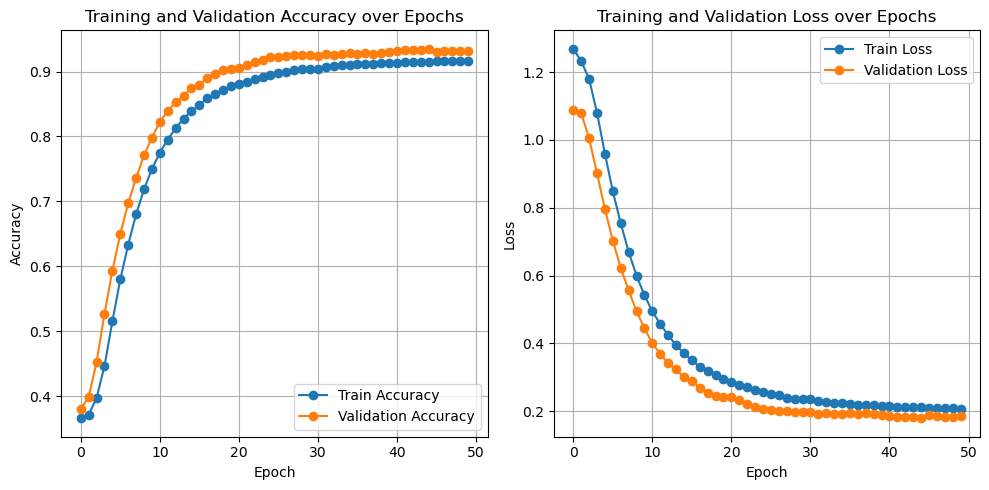

In [221]:
test_model_accuracy(model)